<a href="https://colab.research.google.com/github/dyva101/economiaambiental/blob/main/final_economam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install rasterio
%pip install geopandas

import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# TRABALHO - ANÁLISE ESPACIAL DOS DADOS

## IMPORTANDO DADOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importando bases de dado necessárias
rj = gpd.read_file("/content/drive/MyDrive/Economã/Limite_de_Bairros/Limite_de_Bairros.shp")
ismfi = gpd.read_file('/content/drive/MyDrive/Economã/ismfi_grade/ismfi_grade/indice.shp')
cobertura_vegetal_br = gpd.read_file('/content/drive/MyDrive/Economã/Cobertura_Veg_RJ/Cobertura_Vegetal_e_Uso_da_Terra_2010.shp')
drenagem_rj = gpd.read_file('/content/drive/MyDrive/Economã/Redes_de_Drena_Pluvial_RJ/Redes_de_Drenagem_Pluvial_do_Rio_de_Janeiro.shp')
IDS_rj = gpd.read_file('/content/drive/MyDrive/Economã/IDS_RJ/%C3%8Dndice_de_Desenvolvimento_Social_(IDS)_-_Regi%C3%A3o_Metropolitana_do_RJ_(2010).shp')
biomas_br = gpd.read_file('/content/drive/MyDrive/Economã/Biomas/lm_bioma_250.shp')
limites_rj = gpd.read_file('/content/drive/MyDrive/Economã/Limite_de_Bairros/Limite_de_Bairros.shp')
level_curves_br = gpd.read_file('/content/drive/MyDrive/Economã/GEOFT_Curva_Nivel/GEOFT_CURVA_NIVEL.shp')

In [ ]:
cobertura_vegetal_br = gpd.read_file('/content/drive/MyDrive/Economã/Cobertura_Veg_RJ/Cobertura_Vegetal_e_Uso_da_Terra_2010.shp')

In [ ]:
rj = gpd.read_file("/content/drive/MyDrive/Economã/Limite_de_Bairros/Limite_de_Bairros.shp")

## Plot's Rio de Janeiro e ISMFI

adaptação dos códigos feitos em sala de aula

<Axes: >

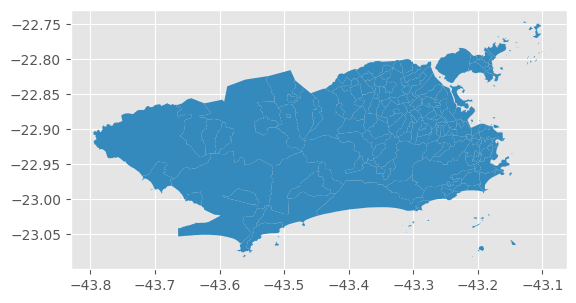

In [ ]:
rj.plot()

In [ ]:
ismfi

ID_UNICO  MASC  FEM  POP  DOM_OCU          area  FID_  \
0      200ME60498N87608     0    0    0        0    292.965732  None   
1      200ME60498N87610     0    0    0        0  12674.140060  None   
2      200ME60498N87612     0    0    0        0  25718.992086  None   
3      200ME60498N87614     0    0    0        0  19649.433589  None   
4      200ME60498N87616     0    0    0        0      2.243440  None   
...                 ...   ...  ...  ...      ...           ...   ...   
31774     1KME6109N8740     0    0    0        0   8188.601231  None   
31775     1KME6116N8770     0    0    0        0   1876.912166  None   
31776     1KME6116N8775     0    0    0        0   9696.235440  None   
31777     1KME6121N8771     0    0    0        0    418.129407  None   
31778     1KME6122N8772     0    0    0        0   3913.958112  None   

             ID_UNICO_1    Ica   Idec  Iprox       Iimp  ISMFI_corr  \
0      200ME60498N87608  100.0  100.0    0.0   0.067037   29.937044   
1      200ME60498N87610  100.0  100.0    0.0   3.090052   31.282745   
2      200ME60498N87612   75.0   50.0    0.0   6.325531   22.781530   
3      200ME60498N87614  100.0   50.0    0.0  14.373379   30.396055   
4      200ME60498N87616  100.0  100.0    0.0   0.000000   29.906976   
...                 ...    ...    ...    ...        ...         ...   
31774     1KME6109N8740  100.0  100.0    0.0   0.712498   30.226040   
31775     1KME6116N8770    0.0  100.0    0.0   0.150522    0.384367   
31776     1KME6116N8775  100.0  100.0    0.0   0.923962   30.320519   
31777     1KME6121N8771    0.0  100.0    0.0   0.035460    0.129973   
31778     1KME6122N8772  100.0  100.0    0.0   0.338794   30.058832   

                                                geometry  
0      POLYGON ((623726.957 7464659.502, 623717.397 7...  
1      POLYGON ((623726.188 7464686.904, 623705.294 7...  
2      POLYGON ((623720.561 7464887.397, 623614.184 7...  
3      POLYGON ((623714.934 7465087.888, 623576.774 7...  
4      POLYGON ((623709.306 7465288.378, 623706.487 7...  
...                                                  ...  
31774  POLYGON ((683592.977 7446267.715, 683561.477 7...  
31775  MULTIPOLYGON (((689545.531 7476558.448, 689540...  
31776  POLYGON ((689273.644 7480778.053, 689286.484 7...  
31777  POLYGON ((694204.352 7477244.659, 694204.127 7...  
31778  POLYGON ((695351.894 7478087.052, 695347.804 7...  

[31779 rows x 14 columns]

(619940.0160978794, 698942.9358587307, 7444399.431338712, 7485238.984202462)

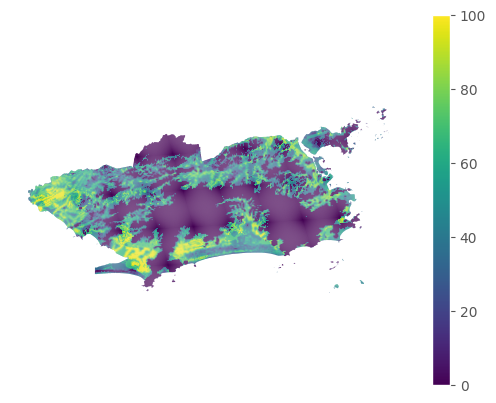

In [ ]:
ismfi.plot(column='ISMFI_corr', legend=True)
plt.axis('off')

In [ ]:
# FIXING CRS
rj = rj.to_crs(ismfi.crs)

In [ ]:
# Joining databases
merged = rj.sjoin(ismfi[['geometry','ISMFI_corr']],how='left',predicate='intersects')
merged

objectid          área               nome regiao_adm area_plane  \
0         325  1.705685e+06            Paquetá    PAQUETA          1   
0         325  1.705685e+06            Paquetá    PAQUETA          1   
0         325  1.705685e+06            Paquetá    PAQUETA          1   
0         325  1.705685e+06            Paquetá    PAQUETA          1   
0         325  1.705685e+06            Paquetá    PAQUETA          1   
..        ...           ...                ...        ...        ...   
163       894  7.714616e+06  Ilha de Guaratiba  GUARATIBA          5   
163       894  7.714616e+06  Ilha de Guaratiba  GUARATIBA          5   
163       894  7.714616e+06  Ilha de Guaratiba  GUARATIBA          5   
163       894  7.714616e+06  Ilha de Guaratiba  GUARATIBA          5   
163       894  7.714616e+06  Ilha de Guaratiba  GUARATIBA          5   

    codbairro  codra  codbnum                                         link  \
0         013     21       13                             Paqueta&area=013   
0         013     21       13                             Paqueta&area=013   
0         013     21       13                             Paqueta&area=013   
0         013     21       13                             Paqueta&area=013   
0         013     21       13                             Paqueta&area=013   
..        ...    ...      ...                                          ...   
163       164     26      164  Ilha de Guaratiba                 &area=164   
163       164     26      164  Ilha de Guaratiba                 &area=164   
163       164     26      164  Ilha de Guaratiba                 &area=164   
163       164     26      164  Ilha de Guaratiba                 &area=164   
163       164     26      164  Ilha de Guaratiba                 &area=164   

            rp cod_rp  codbairro_    st_areasha    st_perimet  \
0       Centro    1.1          13  1.705689e+06  24841.459984   
0       Centro    1.1          13  1.705689e+06  24841.459984   
0       Centro    1.1          13  1.705689e+06  24841.459984   
0       Centro    1.1          13  1.705689e+06  24841.459984   
0       Centro    1.1          13  1.705689e+06  24841.459984   
..         ...    ...         ...           ...           ...   
163  Guaratiba    5.4         164  7.714637e+06  13955.136856   
163  Guaratiba    5.4         164  7.714637e+06  13955.136856   
163  Guaratiba    5.4         164  7.714637e+06  13955.136856   
163  Guaratiba    5.4         164  7.714637e+06  13955.136856   
163  Guaratiba    5.4         164  7.714637e+06  13955.136856   

                                              geometry  index_right  \
0    MULTIPOLYGON (((694511.597 7483033.908, 694510...        31653   
0    MULTIPOLYGON (((694511.597 7483033.908, 694510...        31654   
0    MULTIPOLYGON (((694511.597 7483033.908, 694510...        31655   
0    MULTIPOLYGON (((694511.597 7483033.908, 694510...        31656   
0    MULTIPOLYGON (((694511.597 7483033.908, 694510...        31657   
..                                                 ...          ...   
163  POLYGON ((646478.944 7457463.030, 646565.580 7...         8453   
163  POLYGON ((646478.944 7457463.030, 646565.580 7...         7776   
163  POLYGON ((646478.944 7457463.030, 646565.580 7...         7777   
163  POLYGON ((646478.944 7457463.030, 646565.580 7...         7778   
163  POLYGON ((646478.944 7457463.030, 646565.580 7...         8458   

     ISMFI_corr  
0     24.600999  
0     24.928217  
0     28.467524  
0     37.257764  
0     34.314112  
..          ...  
163   36.082034  
163   18.476684  
163   21.985894  
163   21.617264  
163   23.041530  

[36733 rows x 17 columns]

In [ ]:
# merging dataframes
merged = merged[['codbairro','regiao_adm','ISMFI_corr']].groupby(['codbairro','regiao_adm']).agg('mean').reset_index().merge(rj[['codbairro','geometry']])

<Axes: >

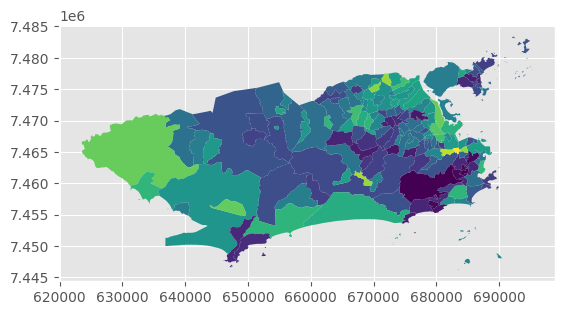

In [ ]:
# turning it back to geodataframe
merged = gpd.GeoDataFrame(merged)
merged.plot(column='ISMFI_corr')

In [ ]:
# Filtrando os resultados para regioes_adm igual a "COMPLEXO DA MARE" ou "JACAREZINHO"
filtered_merged = merged.query('regiao_adm == "COMPLEXO DA MARE" or regiao_adm == "JACAREZINHO" or regiao_adm=="RAMOS" or regiao_adm =="MEIER"')
print(filtered_merged)

    codbairro        regiao_adm  ISMFI_corr  \
38        039             RAMOS   53.628685   
39        040             RAMOS   37.114108   
40        041             RAMOS   39.670996   
41        042             RAMOS   33.718669   
50        051             MEIER   36.299492   
56        057             MEIER   18.944962   
57        058             MEIER   26.263873   
58        059             MEIER   20.463079   
59        060             MEIER   20.741365   
60        061             MEIER   17.288706   
61        062             MEIER    6.111280   
62        063             MEIER   29.446320   
63        064             MEIER   29.420993   
64        065             MEIER   25.511059   
65        066             MEIER   27.361927   
66        067             MEIER    4.125603   
67        068             MEIER   32.669185   
68        069             MEIER   14.520528   
69        070             MEIER   28.506718   
70        071             MEIER   25.449720   
154       155

<Axes: >

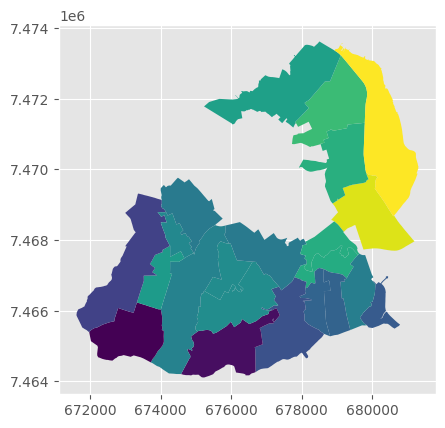

In [ ]:
#Plotting!
filtered_merged = gpd.GeoDataFrame(filtered_merged)
filtered_merged.plot(column='ISMFI_corr')

In [ ]:
filtered_merged

codbairro        regiao_adm  ISMFI_corr  \
38        039             RAMOS   53.628685   
39        040             RAMOS   37.114108   
40        041             RAMOS   39.670996   
41        042             RAMOS   33.718669   
50        051             MEIER   36.299492   
56        057             MEIER   18.944962   
57        058             MEIER   26.263873   
58        059             MEIER   20.463079   
59        060             MEIER   20.741365   
60        061             MEIER   17.288706   
61        062             MEIER    6.111280   
62        063             MEIER   29.446320   
63        064             MEIER   29.420993   
64        065             MEIER   25.511059   
65        066             MEIER   27.361927   
66        067             MEIER    4.125603   
67        068             MEIER   32.669185   
68        069             MEIER   14.520528   
69        070             MEIER   28.506718   
70        071             MEIER   25.449720   
154       155       JACAREZINHO   36.601759   
156       157  COMPLEXO DA MARE   56.391716   

                                              geometry  
38   POLYGON ((680620.155 7468694.473, 680658.115 7...  
39   POLYGON ((679829.514 7469897.674, 679830.504 7...  
40   POLYGON ((679526.374 7472738.558, 679619.224 7...  
41   POLYGON ((678931.173 7473371.169, 678990.693 7...  
50   POLYGON ((679596.243 7467577.281, 679581.253 7...  
56   POLYGON ((680383.954 7466494.020, 680377.994 7...  
57   POLYGON ((679709.723 7467576.381, 679737.613 7...  
58   POLYGON ((679273.333 7466916.770, 679241.102 7...  
59   POLYGON ((678626.782 7467172.781, 678625.801 7...  
60   POLYGON ((678108.801 7466634.481, 678101.891 7...  
61   POLYGON ((677290.989 7466058.340, 677382.009 7...  
62   POLYGON ((676931.699 7467015.341, 676943.229 7...  
63   POLYGON ((675935.418 7467899.972, 675986.348 7...  
64   POLYGON ((676596.219 7468251.043, 676659.879 7...  
65   POLYGON ((675661.298 7468388.884, 675704.018 7...  
66   POLYGON ((674011.225 7466033.291, 674010.645 7...  
67   POLYGON ((674676.226 7467481.232, 674649.406 7...  
68   POLYGON ((673487.895 7469287.645, 673519.015 7...  
69   POLYGON ((674962.667 7467604.732, 674953.457 7...  
70   POLYGON ((674956.577 7469540.675, 675014.977 7...  
154  POLYGON ((679193.273 7468233.192, 679178.143 7...  
156  POLYGON ((681285.606 7469879.614, 681223.196 7...

In [ ]:
# Dissolving
merged = merged[['regiao_adm','geometry','ISMFI_corr']].dissolve(by='regiao_adm',aggfunc='mean').reset_index()
merged

regiao_adm                                           geometry  \
0             ANCHIETA  POLYGON ((666856.067 7474160.043, 666984.128 7...   
1                BANGU  POLYGON ((656953.642 7465095.024, 657034.532 7...   
2      BARRA DA TIJUCA  MULTIPOLYGON (((652551.173 7448903.453, 652555...   
3             BOTAFOGO  MULTIPOLYGON (((684580.728 7459534.009, 684548...   
4         CAMPO GRANDE  POLYGON ((643004.223 7463074.103, 642951.313 7...   
5               CENTRO  MULTIPOLYGON (((687053.602 7464818.066, 687021...   
6       CIDADE DE DEUS  POLYGON ((668009.766 7462017.727, 668043.226 7...   
7     COMPLEXO DA MARE  POLYGON ((681285.606 7469879.614, 681223.196 7...   
8   COMPLEXO DO ALEMÃO  POLYGON ((677818.671 7471301.757, 677830.511 7...   
9           COPACABANA  MULTIPOLYGON (((686300.069 7456822.145, 686293...   
10           GUARATIBA  MULTIPOLYGON (((637238.914 7455851.815, 637239...   
11  ILHA DO GOVERNADOR  MULTIPOLYGON (((682916.218 7469685.313, 682922...   
12             INHAUMA  POLYGON ((678895.912 7468544.263, 678922.102 7...   
13               IRAJA  POLYGON ((673677.596 7470790.457, 673676.856 7...   
14         JACAREPAGUA  POLYGON ((672272.222 7464662.069, 672293.632 7...   
15         JACAREZINHO  POLYGON ((679193.273 7468233.192, 679178.143 7...   
16               LAGOA  MULTIPOLYGON (((683486.703 7446293.082, 683478...   
17           MADUREIRA  POLYGON ((669822.660 7467728.664, 668604.278 7...   
18               MEIER  POLYGON ((676655.518 7464238.148, 676578.638 7...   
19             PAQUETA  MULTIPOLYGON (((692627.233 7476800.830, 692622...   
20              PAVUNA  POLYGON ((668253.649 7473652.162, 668253.959 7...   
21               PENHA  POLYGON ((678965.703 7473777.920, 678966.704 7...   
22           PORTUARIA  MULTIPOLYGON (((684973.520 7465959.478, 684944...   
23               RAMOS  POLYGON ((680684.165 7468595.612, 680701.985 7...   
24            REALENGO  POLYGON ((666639.846 7467774.085, 666637.746 7...   
25        RIO COMPRIDO  POLYGON ((685130.760 7464903.956, 685153.180 7...   
26             ROCINHA  POLYGON ((679453.060 7457161.398, 679479.310 7...   
27          SANTA CRUZ  MULTIPOLYGON (((633679.620 7457354.477, 633654...   
28        SANTA TEREZA  POLYGON ((685524.210 7464928.186, 685576.220 7...   
29       SAO CRISTOVAO  POLYGON ((681812.706 7468118.561, 681835.326 7...   
30              TIJUCA  POLYGON ((682627.556 7462681.054, 682623.636 7...   
31       VIGARIO GERAL  MULTIPOLYGON (((677337.172 7477098.185, 677338...   
32         VILA ISABEL  POLYGON ((680383.383 7463783.816, 680332.083 7...   

    ISMFI_corr  
0    20.427554  
1    32.440105  
2    23.629728  
3    20.041672  
4    24.117170  
5    35.406754  
6    64.416457  
7    56.391716  
8     4.646393  
9    17.842660  
10   33.321996  
11   21.967558  
12   21.710747  
13   31.200034  
14   24.003951  
15   36.601759  
16   22.066122  
17   30.187330  
18   22.695300  
19   19.093095  
20   36.300191  
21   40.922428  
22   31.016786  
23   41.033115  
24   29.696910  
25   26.220839  
26    1.434266  
27   43.998029  
28    1.578022  
29   34.974659  
30   30.685715  
31   49.143752  
32   33.588743

<Axes: >

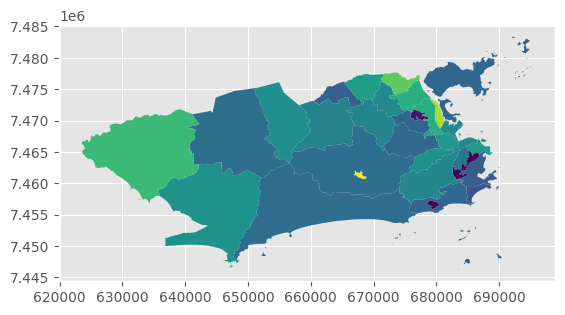

In [ ]:
#Plotting!
merged.plot(column='ISMFI_corr')

In [ ]:
merged_original=merged.copy()

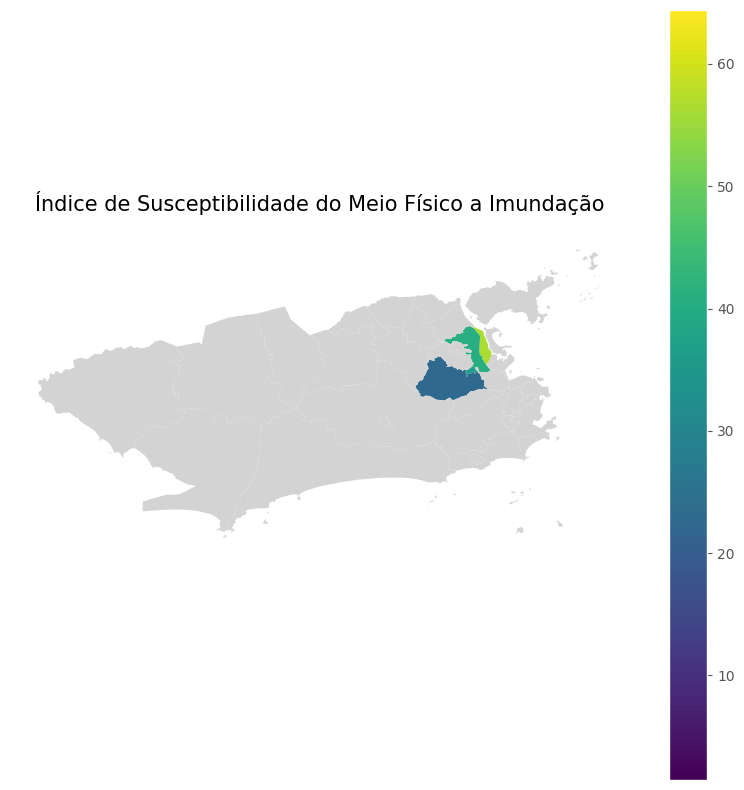

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors


highlight_mask = merged['regiao_adm'].isin(['COMPLEXO DA MARE', 'JACAREZINHO', "RAMOS", "MEIER"])

merged['color'] = merged['ISMFI_corr']
merged.loc[~highlight_mask, 'color'] = float('nan')

# Define a colormap
cmap = plt.cm.viridis
cmap.set_bad('lightgrey')


norm = colors.Normalize(vmin=merged['ISMFI_corr'].min(), vmax=merged['ISMFI_corr'].max())

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='color', cmap=cmap, norm=norm, legend=True, missing_kwds={"color": "lightgrey", "edgecolor": "none"})
ax.axis('off')
ax.set_title("Índice de Susceptibilidade do Meio Físico a Imundação", fontsize=15)

plt.show()

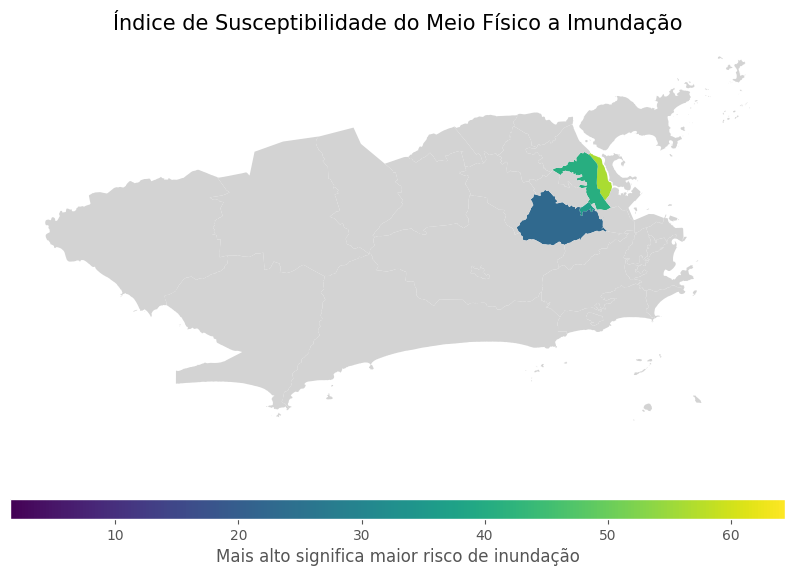

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define a mask for areas of interest
highlight_mask = merged['regiao_adm'].isin(['COMPLEXO DA MARE', 'JACAREZINHO', "RAMOS", "MEIER"])

# Assign 'ISMFI_corr' for highlighted regions, NaN for others
merged['color'] = merged['ISMFI_corr']
merged.loc[~highlight_mask, 'color'] = float('nan')  # Use NaN for non-highlighted regions

# Setup the colormap and normalization
cmap = plt.cm.viridis
cmap.set_bad('lightgrey')  # NaN values will be grey
norm = colors.Normalize(vmin=merged['ISMFI_corr'].min(), vmax=merged['ISMFI_corr'].max())

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.6)  # Adjust the colorbar size and position
pc = merged.plot(column='color', ax=ax, cmap=cmap, norm=norm, legend=False,
                 missing_kwds={"color": "lightgrey", "edgecolor": "none"})

# Creating a ScalarMappable for the colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add colorbar to the plot
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Mais alto significa maior risco de inundação')
ax.set_title("Índice de Susceptibilidade do Meio Físico a Imundação", fontsize=15)

ax.axis('off')
plt.show()


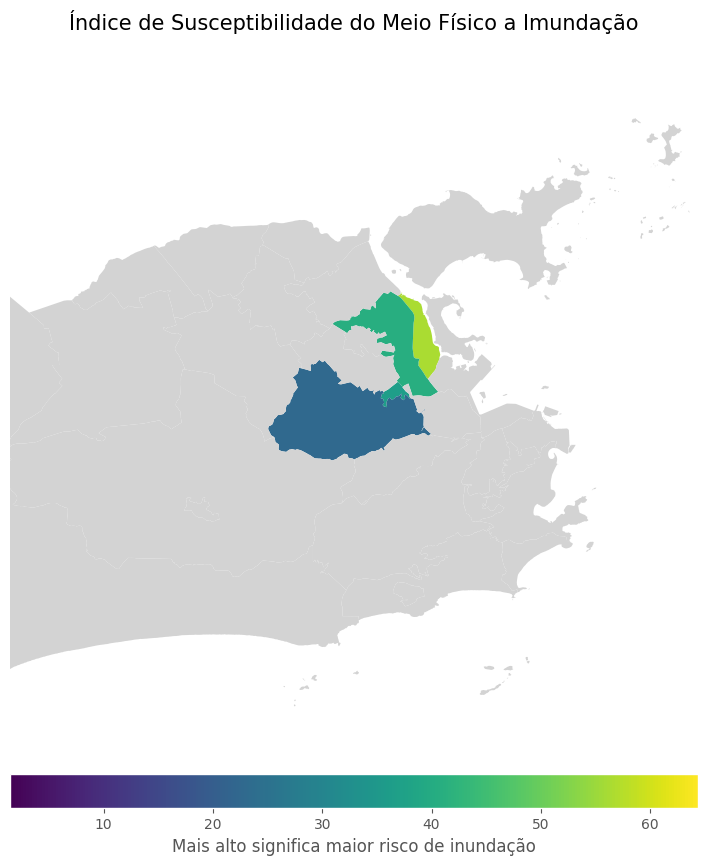

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define a mask for areas of interest
highlight_mask = merged['regiao_adm'].isin(['COMPLEXO DA MARE', 'JACAREZINHO', "RAMOS", "MEIER"])

# Calculate bounds for the highlighted regions
highlighted = merged[highlight_mask]
xmin, ymin, xmax, ymax = highlighted.total_bounds

# Add padding to expand the bounds
# Increase these padding values to lower the zoom level further
padding = 1.5  # adjust as needed
xpad = padding * (xmax - xmin)
ypad = padding * (ymax - ymin)

# Assign 'ISMFI_corr' for highlighted regions, NaN for others
merged['color'] = merged['ISMFI_corr']
merged.loc[~highlight_mask, 'color'] = float('nan')

# Setup the colormap and normalization
cmap = plt.cm.viridis
cmap.set_bad('lightgrey')
norm = colors.Normalize(vmin=merged['ISMFI_corr'].min(), vmax=merged['ISMFI_corr'].max())

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.6)  # Adjust the colorbar size and position
pc = merged.plot(column='color', ax=ax, cmap=cmap, norm=norm, legend=False,
                 missing_kwds={"color": "lightgrey", "edgecolor": "none"})

# Set the x and y limits to zoom out a bit by adding padding
ax.set_xlim(xmin - xpad, xmax + xpad)
ax.set_ylim(ymin - ypad, ymax + ypad)

# Creating a ScalarMappable for the colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necessary for the colorbar

# Add colorbar to the plot
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Mais alto significa maior risco de inundação')
ax.set_title("Índice de Susceptibilidade do Meio Físico a Imundação", fontsize=15)

ax.axis('off')
plt.show()


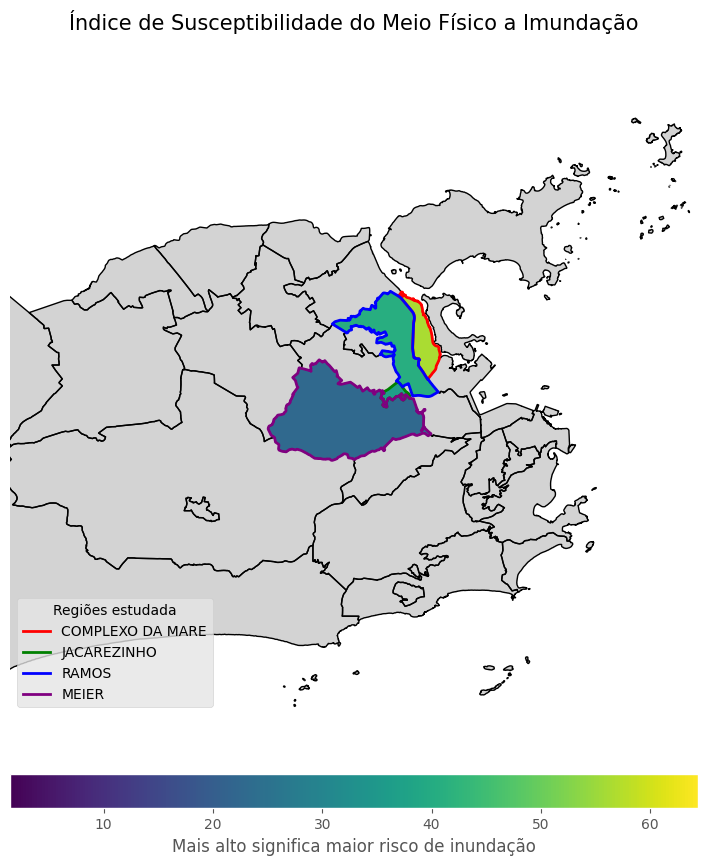

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D


# Define the regions to highlight
highlighted_regions = ['COMPLEXO DA MARE', 'JACAREZINHO', "RAMOS", "MEIER"]
highlight_mask = merged['regiao_adm'].isin(highlighted_regions)

# Assign 'ISMFI_corr' for all regions but set NaN for non-highlighted regions for grey color
merged['color'] = merged['ISMFI_corr']
merged.loc[~highlight_mask, 'color'] = float('nan')  # NaN for non-highlighted regions

# Setup colormap and normalization
cmap = plt.cm.viridis
cmap.set_bad('lightgrey')  # Grey for NaN values
norm = colors.Normalize(vmin=merged['ISMFI_corr'].min(), vmax=merged['ISMFI_corr'].max())

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.6)  # Adjust the colorbar size and position

# Plot the data
pc = merged.plot(column='color', ax=ax, cmap=cmap, norm=norm, legend=False,
                 missing_kwds={"color": "lightgrey", "edgecolor": "none"})

# Plot black contours for non-highlighted regions
non_highlighted = merged[~highlight_mask]
non_highlighted.boundary.plot(ax=ax, color='black', linewidth=1)

# Plot contours for each highlighted region with unique colors
colors = ['red', 'green', 'blue', 'purple']
color_dict = dict(zip(highlighted_regions, colors))
for region, color in color_dict.items():
    region_data = merged[merged['regiao_adm'] == region]
    region_data.boundary.plot(ax=ax, color=color, linewidth=2)

# Create a custom legend for highlighted regions
legend_elements = [Line2D([0], [0], color=color, lw=2, label=region) for region, color in color_dict.items()]
ax.legend(handles=legend_elements, title="Regiões estudada", loc='lower left')

# ScalarMappable and Colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necessary for the colorbar
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Mais alto significa maior risco de inundação')

# Calculate the total bounds for the highlighted regions
highlighted = merged[highlight_mask]
xmin, ymin, xmax, ymax = highlighted.total_bounds

# Add padding to expand the bounds for less zoom
padding = 1.5
xpad = padding * (xmax - xmin)
ypad = padding * (ymax - ymin)
ax.set_xlim(xmin - xpad, xmax + xpad)
ax.set_ylim(ymin - ypad, ymax + ypad)

# Title and axis off
ax.set_title("Índice de Susceptibilidade do Meio Físico a Imundação", fontsize=15)
ax.axis('off')
plt.show()


## Delimitação da Região a ser estudada

In [ ]:
limites_rj_mare_jacare = limites_rj.query('regiao_adm == "COMPLEXO DA MARE" or regiao_adm == "JACAREZINHO" or regiao_adm=="RAMOS" or regiao_adm =="MEIER"')

## Por Que Utilizar (MIRANDA, 2016)?

### Cobertura Vegetal na região

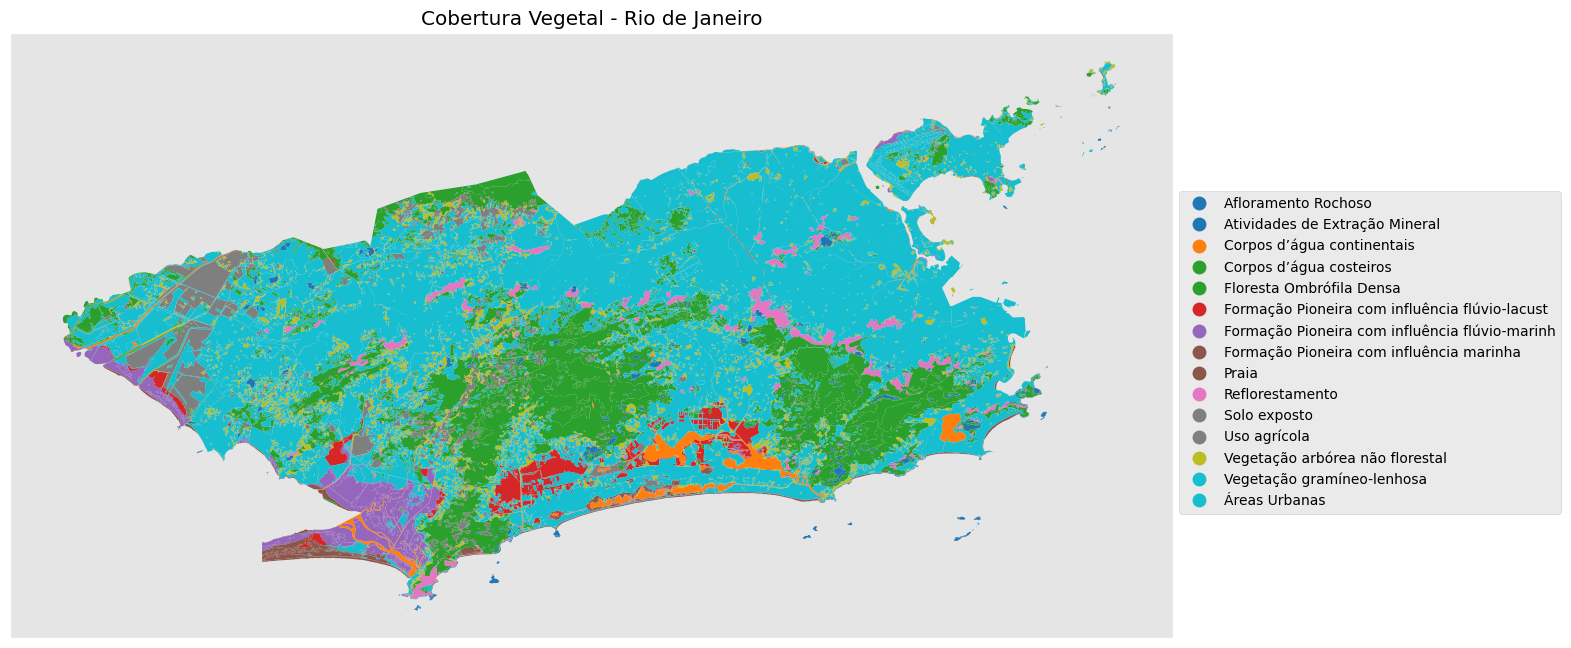

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))

cobertura_vegetal_br.plot(ax=ax, column='classe', legend=True)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.75))
leg._loc = 2

ax.set_title('Cobertura Vegetal - Rio de Janeiro')

ax.set_xticks([])
ax.set_yticks([])

plt.show()

<ipython-input-406-6c635ac1f847>:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:31983
Right CRS: EPSG:4326

  cobertura_vegetal_rj = gpd.clip(cobertura_vegetal_br, limites_rj_mare_jacare)


[]

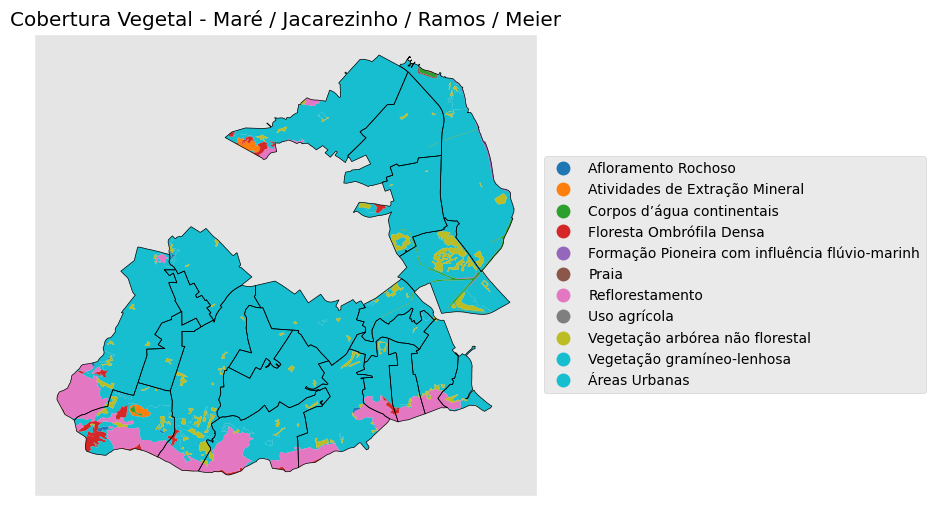

In [ ]:
from matplotlib.patches import Patch
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

#Validando Dados e Geometrias
cobertura_vegetal_br.crs = rj.crs

cobertura_vegetal_br = cobertura_vegetal_br.dropna(subset=['geometry'])

#Cobertura Vegetal da região analisada
cobertura_vegetal_rj = gpd.clip(cobertura_vegetal_br, limites_rj_mare_jacare)

f, ax = plt.subplots(figsize=(10, 6))
limites_rj_mare_jacare.boundary.plot(ax=ax, color='black', lw=.5)
cobertura_vegetal_rj_plot = cobertura_vegetal_rj.plot(column='classe', ax=ax, legend=True)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.75))
leg._loc = 2

ax.set_title('Cobertura Vegetal - Maré / Jacarezinho / Ramos / Meier')

# Ajustes Estéticos
ax.set_xticks([])
ax.set_yticks([])


### Biomas presentes

informações sobre proximidade com o litoral!!!

### Sobreposição Cobertura Vegetal - ISMFI (Convergência)

<ipython-input-407-0d5a1d678ed9>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


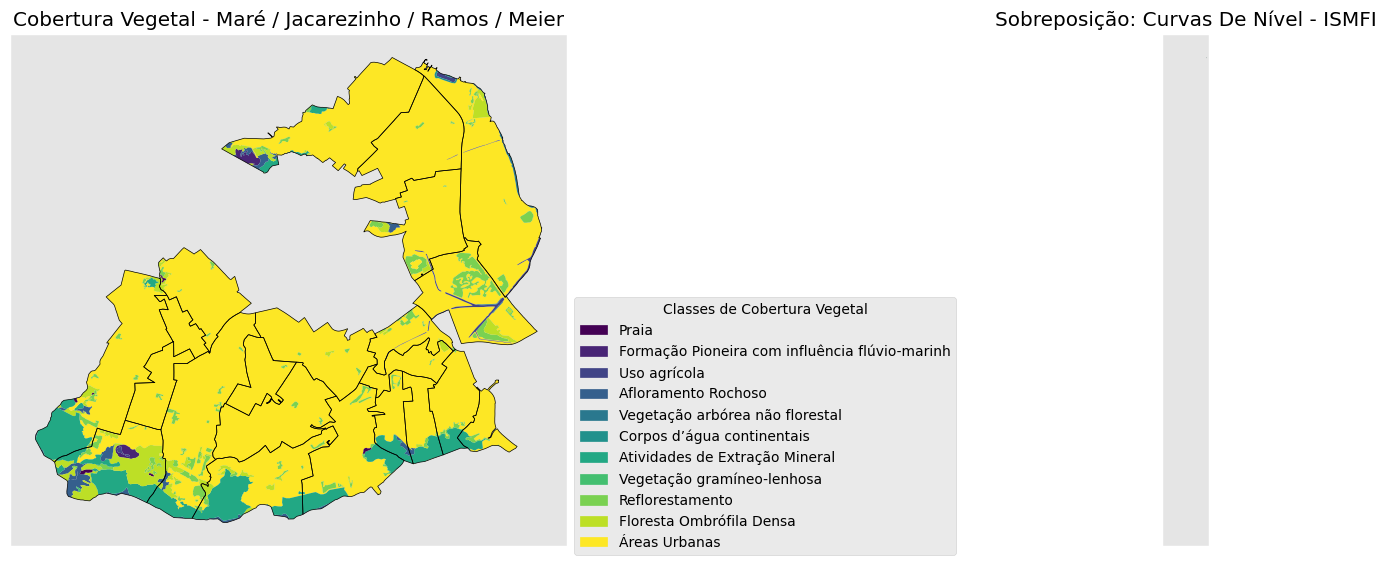

In [ ]:
#comparação dos mapas

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

limites_rj_mare_jacare.boundary.plot(ax=axes[0], color='black', lw=.5)
cobertura_vegetal_rj_plot = cobertura_vegetal_rj.plot(column='classe', ax=axes[0], cmap='viridis', legend=True)

axes[0].set_title('Cobertura Vegetal - Maré / Jacarezinho / Ramos / Meier')

# Ajustes Estéticos
axes[0].set_xticks([])
axes[0].set_yticks([])

classes = cobertura_vegetal_rj['classe'].unique()[::-1]

# Crie um mapeador de cores com o colormap 'viridis'
cmap = get_cmap('viridis')
norm = Normalize(vmin=0, vmax=len(classes) - 1)

# Obtenha as cores para cada classe
colors = {classe: cmap(norm(i)) for i, classe in enumerate(classes)}

# Crie patches para cada classe
patches = [Patch(color=colors[classe], label=classe) for classe in classes]

# Adicionar a legenda personalizada fora do gráfico
axes[0].legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 0.5), title="Classes de Cobertura Vegetal", fontsize='10')

# Ajuste o layout para garantir que a legenda esteja visível
plt.tight_layout(rect=[0, 0, 0.75, 1])

limites_rj_mare_jacare.boundary.plot(ax=axes[1], color='black', lw=.5)
filtered_merged.plot(column='ISMFI_corr', ax=axes[1], cmap='viridis', legend=False)

axes[1].set_title('Sobreposição: Curvas De Nível - ISMFI')

# Ajustes Estéticos
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()


## Sobreposicão Curvas de Nível - ISMFI

-- TEXTO SOBRE AS RELAÇÕES ENCONTRADAS --

In [ ]:
level_curves_br.crs = limites_rj_mare_jacare.crs

In [ ]:
level_curves_br = level_curves_br.dropna(subset=['geometry'])
limites_rj_mare_jacare = limites_rj_mare_jacare.dropna(subset=['geometry'])

In [ ]:
level_curves_rj = gpd.overlay(level_curves_br, limites_rj_mare_jacare, how='intersection')

<Axes: >

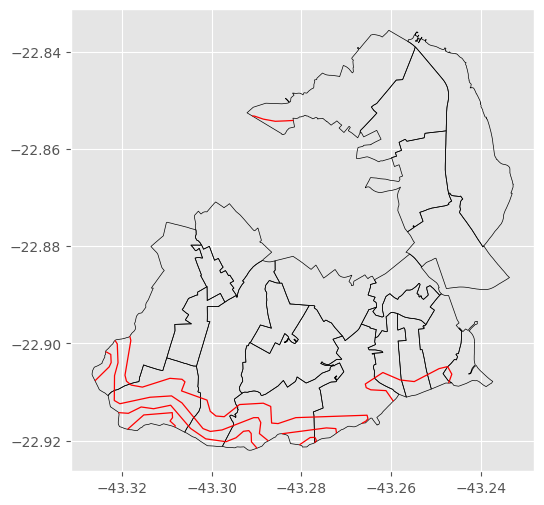

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 6))
limites_rj_mare_jacare.boundary.plot(ax=ax, color='black', lw=.5)
level_curves_rj.plot(ax=ax, color='red', lw=.9)

In [ ]:
crs_target = limites_rj_mare_jacare.crs
level_curves_rj = level_curves_rj.to_crs(crs_target)
filtered_merged = filtered_merged.to_crs(crs_target)


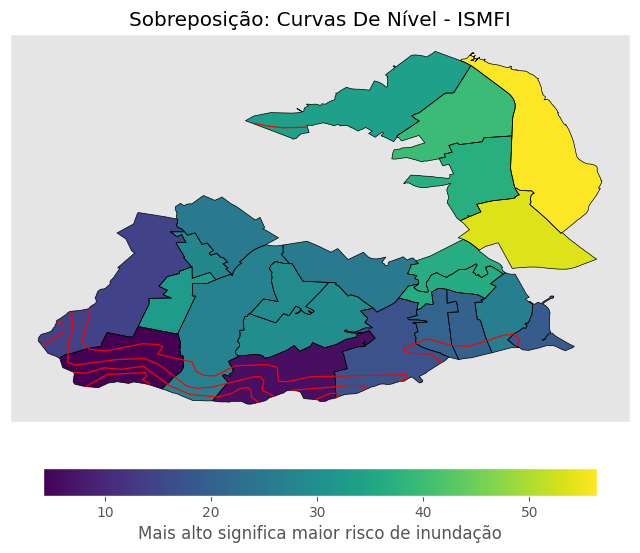

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))

limites_rj_mare_jacare.boundary.plot(ax=ax, color='black', lw=.5)
level_curves_rj.plot(ax=ax, color='red', lw=.9)
filtered_merged.plot(column='ISMFI_corr', ax=ax, cmap='viridis', legend=False)

ax.set_title('Sobreposição: Curvas De Nível - ISMFI')

# Ajustes Estéticos
ax.set_xticks([])
ax.set_yticks([])

# Ajuste o layout para deixar espaço para a legenda e o texto
fig.subplots_adjust(bottom=0.3)

# Adicionar legenda manualmente abaixo do gráfico
cbar = fig.colorbar(ax.collections[2], orientation='horizontal', fraction=0.06, pad=0.1)
cbar.set_label('Mais alto significa maior risco de inundação')

ax.set_aspect('auto')

# Exiba o plot
plt.show()

Sobreposição Cobertura Vegetal - ISMFI

## Sobreposição Drenagem - ISMFI

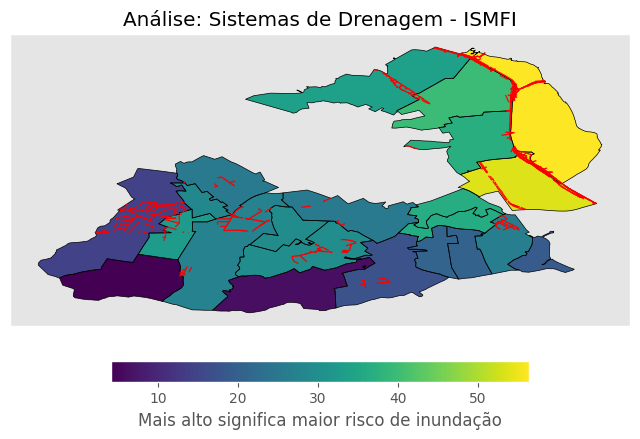

In [ ]:
drenagem_rj.crs = limites_rj_mare_jacare.crs

drenagem_rj = drenagem_rj.dropna(subset=['geometry'])

drenagem_rj_mare_jacare = gpd.overlay(drenagem_rj, limites_rj_mare_jacare, how='intersection')

f, ax = plt.subplots(figsize=(8, 6))

limites_rj_mare_jacare.boundary.plot(ax=ax, color='black', lw=.5)
drenagem_rj_mare_jacare.plot(ax=ax, color='red', lw=.9)
#level_curves_rj.plot(ax=ax, color='orange', lw=.9) #removi as level curves
filtered_merged.plot(column='ISMFI_corr', ax=ax, cmap='viridis', legend=False)

ax.set_title('Análise: Sistemas de Drenagem - ISMFI')

# Ajustes Estéticos
ax.set_xticks([])
ax.set_yticks([])

# Ajuste o layout para deixar espaço para a legenda e o texto
f.subplots_adjust(bottom=0.3)

# Adicionar legenda manualmente abaixo do gráfico
cbar = f.colorbar(ax.collections[2], orientation='horizontal', fraction=0.06, pad=0.1)
cbar.set_label('Mais alto significa maior risco de inundação')

ax.set_aspect('auto')

# Exiba o plot
plt.show()

In [ ]:
limites_rj_mare_jacare.boundary.plot(ax=ax, color='black', lw=.5)
filtered_merged.plot(column='ISMFI_corr', ax=ax, cmap='viridis', legend=False)

ax.set_title('Análise: Sistemas de Drenagem - ISMFI')

# Ajustes Estéticos
ax.set_xticks([])
ax.set_yticks([])

# Ajuste o layout para deixar espaço para a legenda e o texto
f.subplots_adjust(bottom=0.3)

# Adicionar legenda manualmente abaixo do gráfico
cbar = f.colorbar(ax.collections[2], orientation='horizontal', fraction=0.06, pad=0.1)
cbar.set_label('Mais alto significa maior risco de inundação')

ax.set_aspect('auto')

# Exiba o plot
plt.show()

<Figure size 640x480 with 0 Axes>

## Sobreposição ÍDS - ISMFI

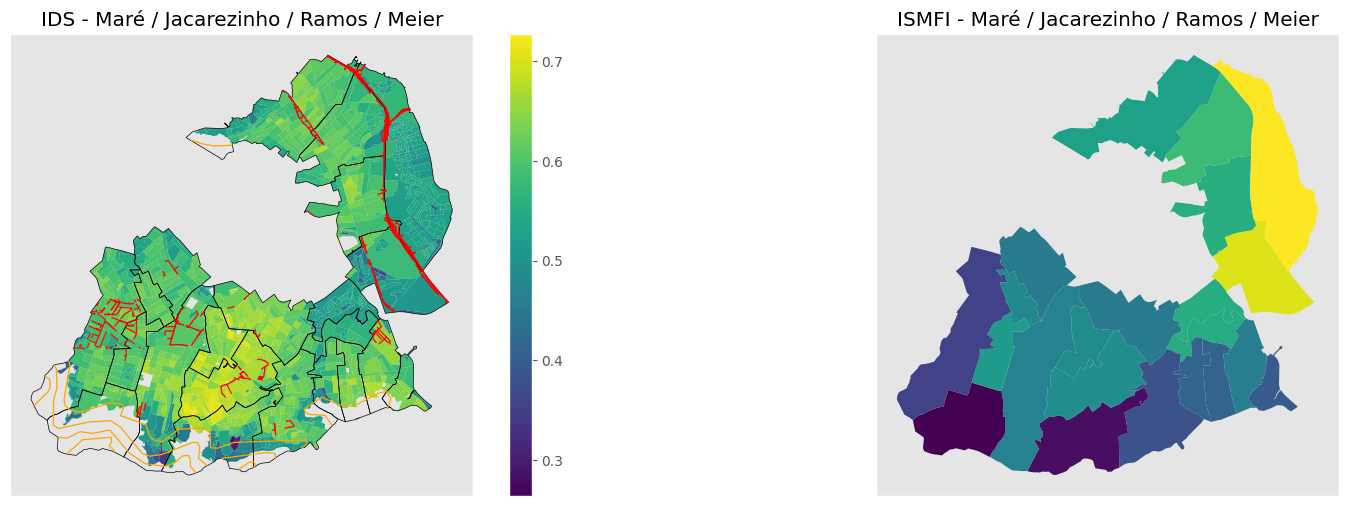

In [ ]:
IDS_rj.crs = limites_rj_mare_jacare.crs

IDS_rj = IDS_rj.dropna(subset=['geometry'])

IDS_RJ_mare_jacare = gpd.overlay(IDS_rj, limites_rj_mare_jacare, how='intersection')

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

limites_rj_mare_jacare.boundary.plot(ax=axes[0], color='black', lw=.5)
drenagem_rj_mare_jacare.plot(ax=axes[0], color='red', lw=.9)
level_curves_rj.plot(ax=axes[0], color='orange', lw=.9)
IDS_RJ_mare_jacare.plot(column='IDS', ax=axes[0], cmap='viridis', legend=True)

axes[0].set_title('IDS - Maré / Jacarezinho / Ramos / Meier')

# Ajustes Estéticos
axes[0].set_xticks([])
axes[0].set_yticks([])

# Ajuste o layout para deixar espaço para a legenda e o texto
fig.subplots_adjust(bottom=0.3)

filtered_merged.plot(column='ISMFI_corr', ax=axes[1], cmap='viridis', legend=False)

axes[1].set_title('ISMFI - Maré / Jacarezinho / Ramos / Meier')

# Ajustes Estéticos
axes[1].set_xticks([])
axes[1].set_yticks([])

# Ajuste o layout para deixar espaço para a legenda e o texto
fig.subplots_adjust(bottom=0.3)

# Exiba o plot
plt.show()

## Centroides & proximidade drenagem

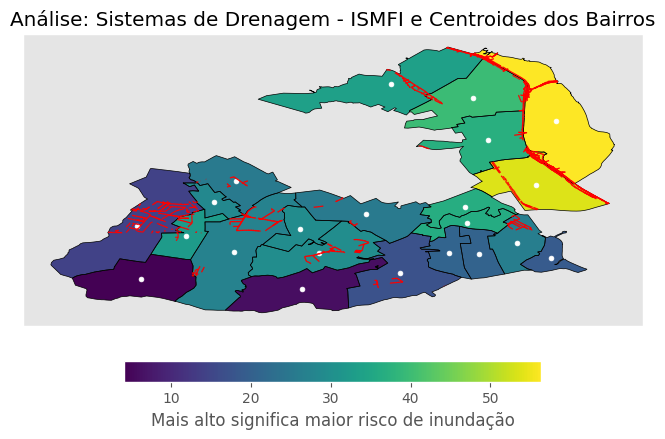

In [ ]:
# Converter para um CRS projetado antes de calcular os centroides
filtered_merged = filtered_merged.to_crs('EPSG:31983')  # SIRGAS 2000 / UTM zone 23S

# Calculando os centroides dos bairros
filtered_merged['centroid'] = filtered_merged.geometry.centroid
centroids = gpd.GeoDataFrame(filtered_merged, geometry='centroid', crs=filtered_merged.crs)

# Converter de volta para o CRS original para plotagem, se necessário
filtered_merged = filtered_merged.to_crs(limites_rj_mare_jacare.crs)
centroids = centroids.to_crs(limites_rj_mare_jacare.crs)

# Plotando os dados
f, ax = plt.subplots(figsize=(8, 6))
limites_rj_mare_jacare.boundary.plot(ax=ax, color='black', lw=.5)
drenagem_rj_mare_jacare.plot(ax=ax, color='red', lw=.9)
filtered_merged.plot(column='ISMFI_corr', ax=ax, cmap='viridis', legend=False)

# Adicionando centroides
centroids.plot(ax=ax, marker='o', color='white', markersize=12)  # Ajuste o tamanho e a cor conforme necessário

# Configurações estéticas
ax.set_title('Análise: Sistemas de Drenagem - ISMFI e Centroides dos Bairros')
ax.set_xticks([])
ax.set_yticks([])
f.subplots_adjust(bottom=0.3)

# Adicionar legenda manualmente abaixo do gráfico
cbar = f.colorbar(ax.collections[2], orientation='horizontal', fraction=0.06, pad=0.1)
cbar.set_label('Mais alto significa maior risco de inundação')
ax.set_aspect('auto')

# Exibir o plot
plt.show()



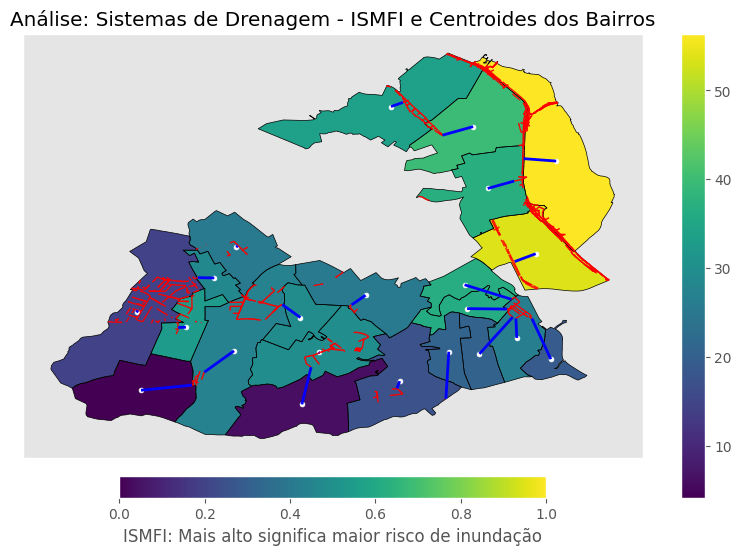

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Converter para um CRS projetado antes de calcular os centroides
filtered_merged = filtered_merged.to_crs('EPSG:31983')  # SIRGAS 2000 / UTM zone 23S

# Calculando os centroides dos bairros
filtered_merged['centroid'] = filtered_merged.geometry.centroid
centroids = gpd.GeoDataFrame(filtered_merged, geometry='centroid', crs=filtered_merged.crs)

# Converter de volta para o CRS original para plotagem, se necessário
filtered_merged = filtered_merged.to_crs(limites_rj_mare_jacare.crs)
centroids = centroids.to_crs(limites_rj_mare_jacare.crs)

# Criar as linhas de conexão novamente
sistema_drenagem_unificado = drenagem_rj_mare_jacare.unary_union
centroids['closest_point_on_drenagem'] = centroids['centroid'].apply(
    lambda x: ops.nearest_points(x, sistema_drenagem_unificado)[1]
)
connections = gpd.GeoDataFrame(
    centroids.apply(lambda x: LineString([x['centroid'], x['closest_point_on_drenagem']]), axis=1),
    columns=['geometry'],
    crs=centroids.crs
)

# Plotando os dados
f, ax = plt.subplots(figsize=(10, 8))
limites_rj_mare_jacare.boundary.plot(ax=ax, color='black', lw=.5)
drenagem_rj_mare_jacare.plot(ax=ax, color='red', lw=1)
filtered_merged.plot(column='ISMFI_corr', ax=ax, cmap='viridis', alpha=1, legend=True)  # Ajuste de transparência

# Linhas de conexão
connections.plot(ax=ax, color='blue', lw=2)

# Centroides
centroids.plot(ax=ax, marker='o', color='white', markersize=12)

# Configurações estéticas
ax.set_title('Análise: Sistemas de Drenagem - ISMFI e Centroides dos Bairros')
ax.set_xticks([])
ax.set_yticks([])
f.subplots_adjust(bottom=0.3)

# Ajustando a legenda para uma única horizontal
cbar = plt.colorbar(ax.collections[0], orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('ISMFI: Mais alto significa maior risco de inundação')

ax.set_aspect('auto')

# Exibir o plot
plt.show()


## Correlacao drenagem e ismfi


In [ ]:
centroids

codbairro        regiao_adm  ISMFI_corr  \
38        039             RAMOS   53.628685   
39        040             RAMOS   37.114108   
40        041             RAMOS   39.670996   
41        042             RAMOS   33.718669   
50        051             MEIER   36.299492   
56        057             MEIER   18.944962   
57        058             MEIER   26.263873   
58        059             MEIER   20.463079   
59        060             MEIER   20.741365   
60        061             MEIER   17.288706   
61        062             MEIER    6.111280   
62        063             MEIER   29.446320   
63        064             MEIER   29.420993   
64        065             MEIER   25.511059   
65        066             MEIER   27.361927   
66        067             MEIER    4.125603   
67        068             MEIER   32.669185   
68        069             MEIER   14.520528   
69        070             MEIER   28.506718   
70        071             MEIER   25.449720   
154       155       JACAREZINHO   36.601759   
156       157  COMPLEXO DA MARE   56.391716   

                                              geometry  \
38   POLYGON ((680620.155 7468694.473, 680658.115 7...   
39   POLYGON ((679829.514 7469897.674, 679830.504 7...   
40   POLYGON ((679526.374 7472738.558, 679619.224 7...   
41   POLYGON ((678931.173 7473371.169, 678990.693 7...   
50   POLYGON ((679596.243 7467577.281, 679581.253 7...   
56   POLYGON ((680383.954 7466494.020, 680377.994 7...   
57   POLYGON ((679709.723 7467576.381, 679737.613 7...   
58   POLYGON ((679273.333 7466916.770, 679241.102 7...   
59   POLYGON ((678626.782 7467172.781, 678625.801 7...   
60   POLYGON ((678108.801 7466634.481, 678101.891 7...   
61   POLYGON ((677290.989 7466058.340, 677382.009 7...   
62   POLYGON ((676931.699 7467015.341, 676943.229 7...   
63   POLYGON ((675935.418 7467899.972, 675986.348 7...   
64   POLYGON ((676596.219 7468251.043, 676659.879 7...   
65   POLYGON ((675661.298 7468388.884, 675704.018 7...   
66   POLYGON ((674011.225 7466033.291, 674010.645 7...   
67   POLYGON ((674676.226 7467481.232, 674649.406 7...   
68   POLYGON ((673487.895 7469287.645, 673519.015 7...   
69   POLYGON ((674962.667 7467604.732, 674953.457 7...   
70   POLYGON ((674956.577 7469540.675, 675014.977 7...   
154  POLYGON ((679193.273 7468233.192, 679178.143 7...   
156  POLYGON ((681285.606 7469879.614, 681223.196 7...   

                        centroid    closest_point_on_drenagem  
38   POINT (-43.24583 -22.88057)  POINT (-43.24933 -22.88232)  
39   POINT (-43.25384 -22.86594)  POINT (-43.24942 -22.86429)  
40   POINT (-43.25626 -22.85209)  POINT (-43.26137 -22.85401)  
41   POINT (-43.26998 -22.84760)  POINT (-43.26796 -22.84668)  
50   POINT (-43.25728 -22.89286)  POINT (-43.25062 -22.89296)  
56   POINT (-43.24330 -22.90418)  POINT (-43.24646 -22.89509)  
57   POINT (-43.24898 -22.89943)  POINT (-43.24913 -22.89507)  
58   POINT (-43.25521 -22.90299)  POINT (-43.24967 -22.89476)  
59   POINT (-43.26033 -22.90252)  POINT (-43.26081 -22.91305)  
60   POINT (-43.26852 -22.90911)  POINT (-43.26898 -22.91074)  
61   POINT (-43.28484 -22.91430)  POINT (-43.28330 -22.90599)  
62   POINT (-43.28204 -22.90265)  POINT (-43.28191 -22.90270)  
63   POINT (-43.28508 -22.89487)  POINT (-43.28811 -22.89195)  
64   POINT (-43.27420 -22.88987)  POINT (-43.27655 -22.89202)  
65   POINT (-43.29615 -22.90232)  POINT (-43.30111 -22.90709)  
66   POINT (-43.31168 -22.91114)  POINT (-43.30318 -22.91000)  
67   POINT (-43.30418 -22.89703)  POINT (-43.30548 -22.89708)  
68   POINT (-43.31241 -22.89372)  POINT (-43.31221 -22.89322)  
69   POINT (-43.29945 -22.88598)  POINT (-43.30219 -22.88592)  
70   POINT (-43.29581 -22.87909)  POINT (-43.29551 -22.87878)  
154  POINT (-43.25770 -22.88752)  POINT (-43.24989 -22.89077)  
156  POINT (-43.24241 -22.85981)  POINT (-43.24785 -22.85927)

In [ ]:
filtered_merged

codbairro        regiao_adm  ISMFI_corr  \
38        039             RAMOS   53.628685   
39        040             RAMOS   37.114108   
40        041             RAMOS   39.670996   
41        042             RAMOS   33.718669   
50        051             MEIER   36.299492   
56        057             MEIER   18.944962   
57        058             MEIER   26.263873   
58        059             MEIER   20.463079   
59        060             MEIER   20.741365   
60        061             MEIER   17.288706   
61        062             MEIER    6.111280   
62        063             MEIER   29.446320   
63        064             MEIER   29.420993   
64        065             MEIER   25.511059   
65        066             MEIER   27.361927   
66        067             MEIER    4.125603   
67        068             MEIER   32.669185   
68        069             MEIER   14.520528   
69        070             MEIER   28.506718   
70        071             MEIER   25.449720   
154       155       JACAREZINHO   36.601759   
156       157  COMPLEXO DA MARE   56.391716   

                                              geometry  \
38   POLYGON ((-43.23928 -22.87991, -43.23891 -22.8...   
39   POLYGON ((-43.24713 -22.86913, -43.24712 -22.8...   
40   POLYGON ((-43.25041 -22.84352, -43.24949 -22.8...   
41   POLYGON ((-43.25628 -22.83787, -43.25570 -22.8...   
50   POLYGON ((-43.24913 -22.89011, -43.24928 -22.8...   
56   POLYGON ((-43.24133 -22.89981, -43.24139 -22.8...   
57   POLYGON ((-43.24803 -22.89011, -43.24775 -22.8...   
58   POLYGON ((-43.25220 -22.89611, -43.25251 -22.8...   
59   POLYGON ((-43.25853 -22.89387, -43.25853 -22.8...   
60   POLYGON ((-43.26352 -22.89878, -43.26358 -22.8...   
61   POLYGON ((-43.27142 -22.90407, -43.27051 -22.9...   
62   POLYGON ((-43.27503 -22.89547, -43.27492 -22.8...   
63   POLYGON ((-43.28484 -22.88759, -43.28435 -22.8...   
64   POLYGON ((-43.27844 -22.88435, -43.27782 -22.8...   
65   POLYGON ((-43.28757 -22.88320, -43.28715 -22.8...   
66   POLYGON ((-43.30339 -22.90464, -43.30339 -22.9...   
67   POLYGON ((-43.29707 -22.89150, -43.29733 -22.8...   
68   POLYGON ((-43.30885 -22.87531, -43.30855 -22.8...   
69   POLYGON ((-43.29429 -22.89035, -43.29438 -22.8...   
70   POLYGON ((-43.29457 -22.87287, -43.29399 -22.8...   
154  POLYGON ((-43.25313 -22.88423, -43.25328 -22.8...   
156  POLYGON ((-43.23294 -22.86914, -43.23353 -22.8...   

                           centroid  
38   POINT (679947.358 7468629.765)  
39   POINT (679144.375 7470259.091)  
40   POINT (678914.441 7471796.157)  
41   POINT (677512.253 7472309.992)  
50   POINT (678756.956 7467283.281)  
56   POINT (680175.527 7466011.672)  
57   POINT (679599.154 7466544.922)  
58   POINT (678955.456 7466158.056)  
59   POINT (678431.330 7466217.213)  
60   POINT (677581.817 7465496.971)  
61   POINT (675901.069 7464941.435)  
62   POINT (676204.075 7466228.312)  
63   POINT (675901.737 7467094.043)  
64   POINT (677024.180 7467634.763)  
65   POINT (674756.395 7466282.335)  
66   POINT (673152.206 7465323.078)  
67   POINT (673939.242 7466877.457)  
68   POINT (673099.089 7467253.402)  
69   POINT (674438.516 7468094.937)  
70   POINT (674821.669 7468853.841)  
154  POINT (678720.902 7467874.514)  
156  POINT (680325.434 7470924.510)

<ipython-input-421-0487c833981e>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_merged['distance_to_drenagem'] = filtered_merged.centroid.apply(lambda x: x.distance(drenagem_unified))


Correlação de Pearson entre a distância ao sistema de drenagem e ISMFI: -0.20344967568281985


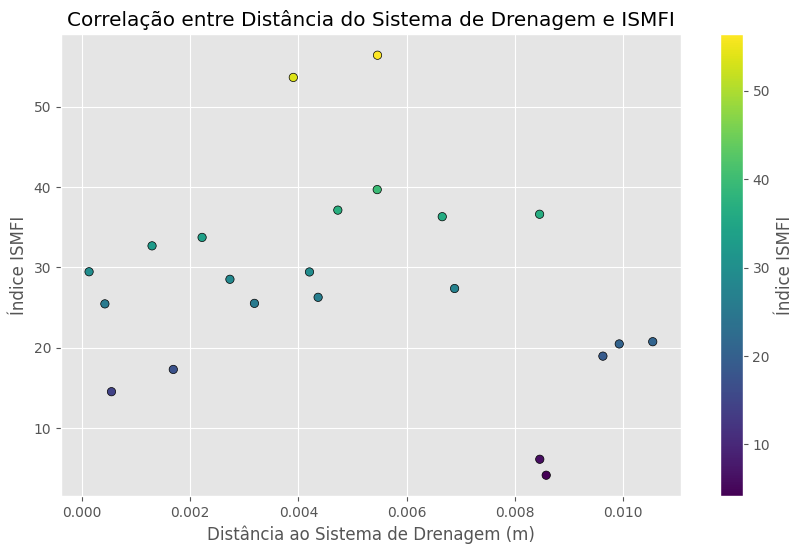

In [ ]:
import geopandas as gpd
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Garantindo que tudo está no mesmo sistema de coordenadas projetado (e.g., EPSG:31983 para SIRGAS 2000 / UTM zone 23S)
if filtered_merged.crs != drenagem_rj_mare_jacare.crs:
    filtered_merged = filtered_merged.to_crs(drenagem_rj_mare_jacare.crs)

# Criando uma união dos sistemas de drenagem para o cálculo da distância
drenagem_unified = drenagem_rj_mare_jacare.unary_union

# Calculando a distância entre cada centróide e a união dos sistemas de drenagem
filtered_merged['distance_to_drenagem'] = filtered_merged.centroid.apply(lambda x: x.distance(drenagem_unified))

# Correlação entre a distância e ISMFI
correlation = pearsonr(filtered_merged['distance_to_drenagem'], filtered_merged['ISMFI_corr'])
print(f"Correlação de Pearson entre a distância ao sistema de drenagem e ISMFI: {correlation[0]}")

# Plotando a relação
fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(filtered_merged['distance_to_drenagem'], filtered_merged['ISMFI_corr'], c=filtered_merged['ISMFI_corr'], cmap='viridis', edgecolor='k')
ax.set_title('Correlação entre Distância do Sistema de Drenagem e ISMFI')
ax.set_xlabel('Distância ao Sistema de Drenagem (m)')
ax.set_ylabel('Índice ISMFI')
colorbar = fig.colorbar(sc)
colorbar.set_label('Índice ISMFI')

plt.show()


In [ ]:
# podemos notar uma leve correlação negativa entre distancia de um sistema de drenagem e risco de enchentes pelo ISMFI
# os bairros com maior altitude estão mais longes de sistema de drenagem, porem, possuem menor ISMFI
# sistemas de drenagem por vezes vão para regiões com maior risco de enchente por outros fatores

## COCOZAP

### importando

In [ ]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from timeit import timeit
pd.options.plotting.backend = "plotly"
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
#Lendo a terceira planilha com os dados
QueixasCocozap = pd.read_csv('/content/drive/MyDrive/Economã/Queixas_Cocozap_Geral.csv',sep = ',', on_bad_lines= 'skip',dtype = 'string')

In [ ]:
QueixasCocozap

Unnamed: 0 codificacao_foto   ano mes dia        data  \
0            0    20181019_0033  2018  10  19  20181019.0   
1            1    20181019_1115  2018  10  19  20181019.0   
2            2    20181105_1650  2018  11  05  20181105.0   
3            3    20181105_1651  2018  11  05  20181105.0   
4            4    20181105_2312  2018  11  05  20181105.0   
..         ...              ...   ...  ..  ..         ...   
306        307    20221018_2137  2022  10  18  20221018.0   
307        308    20221024_1936  2022  10  24  20221024.0   
308        309    20221024_1948  2022  10  24  20221024.0   
309        310    20221024_1950  2022  10  24  20201024.0   
310        311    20221024_1951  2022  10  24  20221024.0   

               Conta para gente o que está acontecendo  \
0    Oi olha só aqui no esgoto da casa 206! Tá um f...   
1            Problemas de alagamentos sempre que chove   
2                                       Sem informacao   
3             Sempre passo por lá e vejo esgoto caindo   
4                                       Sem informacao   
..                                                 ...   
306  Acúmulo de lixo, rua capitão casos 156, baixa....   
307  Vazamento de esgoto, rua Flávia Farnese 480, b...   
308  Acúmulo de lixo, rua nova Jerusalém 345, em fr...   
309  Vazamento de esgoto, rua Nova Jerusalém 482, b...   
310  Buraco na rua, em frente ao número 520, rua no...   

    Em que categoria se encaixaria o problema Categoria 2  \
0                         esgoto a céu aberto      Esgoto   
1                                  alagamento      Esgoto   
2                         esgoto a céu aberto      Esgoto   
3                         esgoto a céu aberto      Esgoto   
4                             acúmulo de lixo        Lixo   
..                                        ...         ...   
306                           Acúmulo de lixo        Lixo   
307                 Transbordamento de esgoto      Esgoto   
308                           Acúmulo de lixo        Lixo   
309                 Transbordamento de esgoto      Esgoto   
310                      Problemas com bueiro      Esgoto   

    Com que frequência isso ocorre  \
0                   Frequentemente   
1                   Ocasionalmente   
2                    Não informado   
3                   Frequentemente   
4                    Não informado   
..                             ...   
306                  Não informado   
307                  Não informado   
308                  Não informado   
309                  Não informado   
310                  Não informado   

    Consegue nos informar o endereço de onde a foto/vídeo foi tirada  \
0                                Rua Massaranduba, 206                 
1                                     Rua Santa Rita,                  
2                     Beco das Américas (Rua Tatajuba)                 
3                     Beco São Jorge (perto da praça)                  
4    Rua Tancredo Neves (em frente à igreja Sagrada...                 
..                                                 ...                 
306  rua capitão casos 156, baixa. Próximo a escola...                 
307         rua Flávia Farnese 480, baixa do sapateiro                 
308          ua nova Jerusalém 345, Baixa do sapateiro                 
309         rua Nova Jerusalém 482, baixa do sapateiro                 
310         rua nova Jerusalém 520, baixa do sapateiro                 

    Em que localidade fica Insira a latitude do seu endereço (opcional)  \
0        Parque Rubens Vaz                                   -22.852344   
1             Nova Holanda                                   -22.853554   
2              Parque Maré                                   -22.854895   
3             Nova Holanda                                   -22.854706   
4             Nova Holanda                                   -22.854318   
..                     ...                                          .

In [ ]:

# Antes de remover, contar o número total de linhas
total_linhas_antes = len(QueixasCocozap)

# Filtrar linhas onde a latitude e a longitude são 'Sem informacao'
filtro = (QueixasCocozap['Insira a latitude do seu endereço (opcional)'] != 'Sem informacao') & (QueixasCocozap['Insira a longitude do seu endereço (opcional)'] != 'Sem informacao')

# Aplicar o filtro ao DataFrame
QueixasCocozap_filtrado = QueixasCocozap[filtro]

# Depois de remover, contar o número total de linhas
total_linhas_depois = len(QueixasCocozap_filtrado)

# Calcular quantas linhas foram removidas
linhas_removidas = total_linhas_antes - total_linhas_depois

print(f"Linhas removidas após aplicar o filtro: {linhas_removidas}")

Linhas removidas após aplicar o filtro: 24


In [ ]:
#Não form removidas muitas linhas, vamos trabalhar com os dados que ja tem latitude e longitude

In [ ]:
# Imprimir as colunas do DataFrame após ajustar o delimitador
print("Colunas do DataFrame após ajuste do delimitador:", QueixasCocozap.columns.tolist())

Colunas do DataFrame após ajuste do delimitador: ['Unnamed: 0', 'codificacao_foto', 'ano', 'mes', 'dia', 'data', 'Conta para gente o que está acontecendo', 'Em que categoria se encaixaria o problema', 'Categoria 2', 'Com que frequência isso ocorre', 'Consegue nos informar o endereço de onde a foto/vídeo foi tirada', 'Em que localidade fica', 'Insira a latitude do seu endereço (opcional)', 'Insira a longitude do seu endereço (opcional)', 'Você já tentou solucionar o problema de alguma forma', 'A quem recorreu']


In [ ]:
import pandas as pd

# Supondo que o DataFrame já está carregado corretamente
# Carregar o DataFrame novamente com o delimitador correto, se necessário
QueixasCocozap = pd.read_csv('/content/drive/MyDrive/Economã/Queixas_Cocozap_Geral.csv', delimiter=',', on_bad_lines='skip', dtype='string')

# Obter valores únicos da coluna 'Em que categoria se encaixaria o problema'
valores_unicos_categoria = QueixasCocozap['Em que categoria se encaixaria o problema'].unique()
print("Valores únicos em 'Em que categoria se encaixaria o problema':", valores_unicos_categoria)

# Obter valores únicos da coluna 'Categoria 2'
valores_unicos_categoria_2 = QueixasCocozap['Categoria 2'].unique()
print("Valores únicos em 'Categoria 2':", valores_unicos_categoria_2)


Valores únicos em 'Em que categoria se encaixaria o problema': <StringArray>
[      'esgoto a céu aberto',                'alagamento',
           'acúmulo de lixo',                   'acumulo',
 'acúmulo de lixo e entulho', 'transbordamento de esgoto',
           'bueiro entupido',   'transbordamento de agua',
 'Transbordamento de esgoto',          'Acumulo de lixo ',
           'Acúmulo de lixo',       'Esgoto a céu aberto',
      'Problemas com bueiro', 'Acúmulo de lixo e entulho',
           'Bueiro entupido',   'Transbordamento de água',
                'Alagamento',         'Qualidade da água',
              "Falta d'água"]
Length: 19, dtype: string
Valores únicos em 'Categoria 2': <StringArray>
[               'Esgoto',                  'Lixo',     'Vazamento de água',
            'Alagamento',              'Drenagem', 'Abastecimento de água']
Length: 6, dtype: string


In [ ]:
# Obter valores únicos da coluna 'Categoria 2'
valores_unicos_freq = QueixasCocozap['Com que frequência isso ocorre'].unique()
print("Valores únicos em 'Com que frequência isso ocorre':", valores_unicos_freq)


Valores únicos em 'Com que frequência isso ocorre': <StringArray>
['Frequentemente', 'Ocasionalmente',  'Não informado',    'Diariamente',
 'Sem informacao']
Length: 5, dtype: string


In [ ]:
import geopandas as gpd
import pandas as pd

# Carregar os dados
data = pd.read_csv('/content/drive/MyDrive/Economã/Queixas_Cocozap_Geral.csv', delimiter=',', on_bad_lines='skip', dtype='string')

# Assegurando que as colunas de latitude e longitude estão no tipo correto
data['Insira a latitude do seu endereço (opcional)'] = pd.to_numeric(data['Insira a latitude do seu endereço (opcional)'], errors='coerce')
data['Insira a longitude do seu endereço (opcional)'] = pd.to_numeric(data['Insira a longitude do seu endereço (opcional)'], errors='coerce')

# Removendo linhas onde a latitude ou a longitude podem ser nulas após a conversão
data.dropna(subset=['Insira a latitude do seu endereço (opcional)', 'Insira a longitude do seu endereço (opcional)'], inplace=True)

# Converter para GeoDataFrame
data['geometry'] = gpd.points_from_xy(data['Insira a longitude do seu endereço (opcional)'], data['Insira a latitude do seu endereço (opcional)'])
geo_data = gpd.GeoDataFrame(data, geometry='geometry')

# Definir CRS original como WGS 84 (EPSG:4326)
geo_data.set_crs('EPSG:4326', inplace=True)

# Converter para o CRS desejado (SIRGAS 2000 / UTM zone 23S)
geo_data = geo_data.to_crs('EPSG:31983')

# Continuar com sua análise ou visualização
print(geo_data.head())


  Unnamed: 0 codificacao_foto   ano mes dia        data  \
0          0    20181019_0033  2018  10  19  20181019.0   
1          1    20181019_1115  2018  10  19  20181019.0   
2          2    20181105_1650  2018  11  05  20181105.0   
3          3    20181105_1651  2018  11  05  20181105.0   
4          4    20181105_2312  2018  11  05  20181105.0   

             Conta para gente o que está acontecendo  \
0  Oi olha só aqui no esgoto da casa 206! Tá um f...   
1          Problemas de alagamentos sempre que chove   
2                                     Sem informacao   
3           Sempre passo por lá e vejo esgoto caindo   
4                                     Sem informacao   

  Em que categoria se encaixaria o problema Categoria 2  \
0                       esgoto a céu aberto      Esgoto   
1                                alagamento      Esgoto   
2                       esgoto a céu aberto      Esgoto   
3                       esgoto a céu aberto      Esgoto   
4            

In [ ]:
geo_data

Unnamed: 0 codificacao_foto   ano mes dia        data  \
0            0    20181019_0033  2018  10  19  20181019.0   
1            1    20181019_1115  2018  10  19  20181019.0   
2            2    20181105_1650  2018  11  05  20181105.0   
3            3    20181105_1651  2018  11  05  20181105.0   
4            4    20181105_2312  2018  11  05  20181105.0   
..         ...              ...   ...  ..  ..         ...   
298        299    20220912_1705  2022  09  12  20220922.0   
307        308    20221024_1936  2022  10  24  20221024.0   
308        309    20221024_1948  2022  10  24  20221024.0   
309        310    20221024_1950  2022  10  24  20201024.0   
310        311    20221024_1951  2022  10  24  20221024.0   

               Conta para gente o que está acontecendo  \
0    Oi olha só aqui no esgoto da casa 206! Tá um f...   
1            Problemas de alagamentos sempre que chove   
2                                       Sem informacao   
3             Sempre passo por lá e vejo esgoto caindo   
4                                       Sem informacao   
..                                                 ...   
298                                   Esgoto entupido    
307  Vazamento de esgoto, rua Flávia Farnese 480, b...   
308  Acúmulo de lixo, rua nova Jerusalém 345, em fr...   
309  Vazamento de esgoto, rua Nova Jerusalém 482, b...   
310  Buraco na rua, em frente ao número 520, rua no...   

    Em que categoria se encaixaria o problema Categoria 2  \
0                         esgoto a céu aberto      Esgoto   
1                                  alagamento      Esgoto   
2                         esgoto a céu aberto      Esgoto   
3                         esgoto a céu aberto      Esgoto   
4                             acúmulo de lixo        Lixo   
..                                        ...         ...   
298                           Bueiro entupido      Esgoto   
307                 Transbordamento de esgoto      Esgoto   
308                           Acúmulo de lixo        Lixo   
309                 Transbordamento de esgoto      Esgoto   
310                      Problemas com bueiro      Esgoto   

    Com que frequência isso ocorre  \
0                   Frequentemente   
1                   Ocasionalmente   
2                    Não informado   
3                   Frequentemente   
4                    Não informado   
..                             ...   
298                 Frequentemente   
307                  Não informado   
308                  Não informado   
309                  Não informado   
310                  Não informado   

    Consegue nos informar o endereço de onde a foto/vídeo foi tirada  \
0                                Rua Massaranduba, 206                 
1                                     Rua Santa Rita,                  
2                     Beco das Américas (Rua Tatajuba)                 
3                     Beco São Jorge (perto da praça)                  
4    Rua Tancredo Neves (em frente à igreja Sagrada...                 
..                                                 ...                 
298                                  Rua Guanabara, 12                 
307         rua Flávia Farnese 480, baixa do sapateiro                 
308          ua nova Jerusalém 345, Baixa do sapateiro                 
309         rua Nova Jerusalém 482, baixa do sapateiro                 
310         rua nova Jerusalém 520, baixa do sapateiro                 

    Em que localidade fica  Insira a latitude do seu endereço (opcional)  \
0        Parque Rubens Vaz                                    -22.852344   
1             Nova Holanda                                    -22.853554   
2              Parque Maré                                    -22.854895   
3             Nova Holanda                                    -22.854706   
4             Nova Holanda                                    -22.854318   
..                     ...                                     

In [ ]:
# Exemplo de como chamar a função para cada valor único nas colunas 'Categoria 2' e 'Em que categoria se encaixaria o problema'
unique_categoria2 = geo_data['Categoria 2'].unique()
unique_problemas = geo_data['Em que categoria se encaixaria o problema'].unique()
print(unique_categoria2)
print(unique_problemas)

<StringArray>
[               'Esgoto',                  'Lixo',     'Vazamento de água',
            'Alagamento',              'Drenagem', 'Abastecimento de água']
Length: 6, dtype: string
<StringArray>
[      'esgoto a céu aberto',                'alagamento',
           'acúmulo de lixo',                   'acumulo',
 'acúmulo de lixo e entulho', 'transbordamento de esgoto',
           'bueiro entupido',   'transbordamento de agua',
 'Transbordamento de esgoto',          'Acumulo de lixo ',
           'Acúmulo de lixo',       'Esgoto a céu aberto',
      'Problemas com bueiro', 'Acúmulo de lixo e entulho',
           'Bueiro entupido',   'Transbordamento de água',
                'Alagamento',         'Qualidade da água']
Length: 18, dtype: string


In [ ]:
import pandas as pd

# Definir um dicionário para mapear as categorias similares para uma única categoria
category_mapping = {
    'acúmulo de lixo': 'Acúmulo de lixo e entulho',
    'acumulo': 'Acúmulo de lixo e entulho',
    'acúmulo de lixo e entulho': 'Acúmulo de lixo e entulho',
    'Acumulo de lixo ': 'Acúmulo de lixo e entulho',
    'Acúmulo de lixo': 'Acúmulo de lixo e entulho',
    'Acúmulo de lixo e entulho': 'Acúmulo de lixo e entulho',
    'transbordamento de esgoto': 'Transbordamento de esgoto',
    'Transbordamento de esgoto': 'Transbordamento de esgoto',
    'bueiro entupido': 'Bueiro entupido',
    'Bueiro entupido': 'Bueiro entupido',
    'Problemas com bueiro': 'Bueiro entupido',
    'esgoto a céu aberto': 'Esgoto a céu aberto',
    'Esgoto a céu aberto': 'Esgoto a céu aberto',
    'alagamento': 'Alagamento',
    'Alagamento': 'Alagamento',
    'transbordamento de agua': 'Transbordamento de água',
    'Transbordamento de agua': 'Transbordamento de água'
}

# Aplicar o mapeamento no DataFrame
geo_data['Em que categoria se encaixaria o problema'] = geo_data['Em que categoria se encaixaria o problema'].replace(category_mapping)

# Verificar os resultados
print(geo_data['Em que categoria se encaixaria o problema'].unique())


<StringArray>
[      'Esgoto a céu aberto',                'Alagamento',
 'Acúmulo de lixo e entulho', 'Transbordamento de esgoto',
           'Bueiro entupido',   'Transbordamento de água',
         'Qualidade da água']
Length: 7, dtype: string


In [ ]:
unique_categoria2 = geo_data['Categoria 2'].unique()
unique_problemas = geo_data['Em que categoria se encaixaria o problema'].unique()
print(unique_categoria2)
print(unique_problemas)

<StringArray>
[               'Esgoto',                  'Lixo',     'Vazamento de água',
            'Alagamento',              'Drenagem', 'Abastecimento de água']
Length: 6, dtype: string
<StringArray>
[      'Esgoto a céu aberto',                'Alagamento',
 'Acúmulo de lixo e entulho', 'Transbordamento de esgoto',
           'Bueiro entupido',   'Transbordamento de água',
         'Qualidade da água']
Length: 7, dtype: string


### plotando


In [ ]:
drenagem_rj = gpd.read_file('/content/drive/MyDrive/Economã/Redes_de_Drena_Pluvial_RJ/Redes_de_Drenagem_Pluvial_do_Rio_de_Janeiro.shp')

drenagem_rj_mare_ramos tem dados válidos.


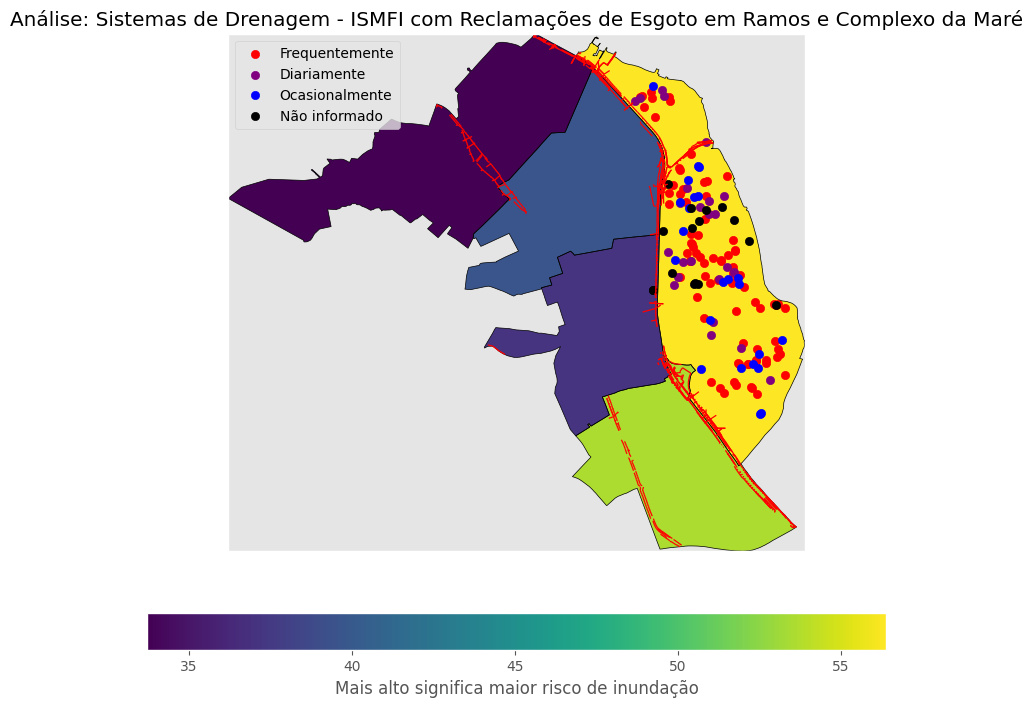

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Definir os novos limites para as regiões de interesse
limites_ramos_mare = limites_rj.query('regiao_adm == "COMPLEXO DA MARE" or regiao_adm == "RAMOS"')

# Carregar os dados de drenagem e definir o CRS correto
drenagem_rj.crs = limites_rj_mare_jacare.crs
drenagem_rj = drenagem_rj.dropna(subset=['geometry'])

# Verificar e garantir que os dados de drenagem e limites_ramos_mare estão no mesmo CRS
if drenagem_rj.crs != limites_ramos_mare.crs:
    drenagem_rj = drenagem_rj.to_crs(limites_ramos_mare.crs)

# Verifique se os DataFrames têm dados válidos
if limites_ramos_mare.empty:
    print("limites_ramos_mare está vazio.")
if drenagem_rj.empty:
    print("drenagem_rj está vazio.")

# Filtrar a drenagem apenas nas regiões de interesse
drenagem_rj_mare_ramos = gpd.overlay(drenagem_rj, limites_ramos_mare, how='intersection')

# Verifique novamente após a sobreposição
if drenagem_rj_mare_ramos.empty:
    print("drenagem_rj_mare_ramos está vazio após a sobreposição.")
else:
    print("drenagem_rj_mare_ramos tem dados válidos.")

# Filtrar as regiões de interesse no merged dataset
filtered_merged = merged.query('regiao_adm == "COMPLEXO DA MARE" or regiao_adm == "RAMOS"')
filtered_merged = gpd.GeoDataFrame(filtered_merged, geometry='geometry')

# Garantir que os CRS são iguais
if filtered_merged.crs != drenagem_rj_mare_ramos.crs:
    filtered_merged = filtered_merged.to_crs(drenagem_rj_mare_ramos.crs)

# Filtrar os pontos de reclamações para as regiões de interesse e reprojetar se necessário
geo_data = geo_data.to_crs(filtered_merged.crs)
data_esgoto_filtered = gpd.sjoin(geo_data[geo_data['Categoria 2'] == 'Esgoto'], filtered_merged, how='inner', predicate='within')

# Mapeamento das cores de acordo com a frequência
color_map = {
    'Frequentemente': 'red',
    'Diariamente': 'purple',
    'Ocasionalmente': 'blue',
    'Não informado': 'black',
    'Sem informacao': 'black'
}

# Adicionar uma coluna de cores ao GeoDataFrame de reclamações
data_esgoto_filtered['color'] = data_esgoto_filtered['Com que frequência isso ocorre'].map(color_map)

# Verifique se os DataFrames têm dados válidos
if filtered_merged.empty:
    print("filtered_merged está vazio.")

# Plotar o mapa base de ISMFI para as regiões selecionadas
fig, ax = plt.subplots(figsize=(10, 8))
limites_ramos_mare.boundary.plot(ax=ax, color='black', lw=.5)

if not drenagem_rj_mare_ramos.empty:
    drenagem_rj_mare_ramos.plot(ax=ax, color='red', lw=.9)
if not filtered_merged.empty:
    filtered_merged.plot(column='ISMFI_corr', ax=ax, cmap='viridis', legend=False, alpha=1)

# Plotar os pontos de reclamações com as cores mapeadas
for frequency, color in color_map.items():
    subset = data_esgoto_filtered[data_esgoto_filtered['Com que frequência isso ocorre'] == frequency]
    if not subset.empty:
        subset.plot(ax=ax, marker='o', color=color, markersize=35, label=frequency)

# Adicionar legenda manualmente abaixo do gráfico
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=filtered_merged['ISMFI_corr'].min(), vmax=filtered_merged['ISMFI_corr'].max()))
sm.set_array([])  # Apenas para inicializar a ScalarMappable
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.06, pad=0.1)
cbar.set_label('Mais alto significa maior risco de inundação')

# Ajustes estéticos
ax.set_title('Análise: Sistemas de Drenagem - ISMFI com Reclamações de Esgoto no Complexo da Maré')
ax.set_xlim([limites_ramos_mare.total_bounds[0], limites_ramos_mare.total_bounds[2]])
ax.set_ylim([limites_ramos_mare.total_bounds[1], limites_ramos_mare.total_bounds[3]])
ax.set_xticks([])
ax.set_yticks([])
ax.legend()

# Ajustar o aspecto do gráfico manualmente
ax.set_aspect('equal')

# Exibir o plot
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_map(geo_data, limites_rj, drenagem_rj, merged, categoria_col, categoria_val):
    """
    Plota um mapa para uma determinada categoria de problemas.

    Parameters:
    - geo_data: GeoDataFrame contendo os dados geográficos dos pontos de reclamação
    - limites_rj: GeoDataFrame contendo os limites das regiões de interesse
    - drenagem_rj: GeoDataFrame contendo os dados de drenagem
    - merged: GeoDataFrame contendo os dados de ISMFI
    - categoria_col: coluna a ser filtrada ('Categoria 2' ou 'Em que categoria se encaixaria o problema')
    - categoria_val: valor da categoria a ser plotada
    """

    # Definir os novos limites para as regiões de interesse
    limites_ramos_mare = limites_rj.query('regiao_adm == "COMPLEXO DA MARE" or regiao_adm == "RAMOS"')

    # Carregar os dados de drenagem e definir o CRS correto
    drenagem_rj.crs = limites_rj.crs
    drenagem_rj = drenagem_rj.dropna(subset=['geometry'])

    # Verificar e garantir que os dados de drenagem e limites_ramos_mare estão no mesmo CRS
    if drenagem_rj.crs != limites_ramos_mare.crs:
        drenagem_rj = drenagem_rj.to_crs(limites_ramos_mare.crs)

    # Filtrar a drenagem apenas nas regiões de interesse
    drenagem_rj_mare_ramos = gpd.overlay(drenagem_rj, limites_ramos_mare, how='intersection')

    # Filtrar as regiões de interesse no merged dataset
    filtered_merged = merged.query('regiao_adm == "COMPLEXO DA MARE" or regiao_adm == "RAMOS"')
    filtered_merged = gpd.GeoDataFrame(filtered_merged, geometry='geometry')

    # Garantir que os CRS são iguais
    if filtered_merged.crs != drenagem_rj_mare_ramos.crs:
        filtered_merged = filtered_merged.to_crs(drenagem_rj_mare_ramos.crs)

    # Filtrar os pontos de reclamações para as regiões de interesse e reprojetar se necessário
    geo_data = geo_data.to_crs(filtered_merged.crs)
    data_esgoto_filtered = gpd.sjoin(geo_data[geo_data[categoria_col] == categoria_val], filtered_merged, how='inner', predicate='within')

    # Mapeamento das cores de acordo com a frequência
    color_map = {
        'Frequentemente': 'red',
        'Diariamente': 'purple',
        'Ocasionalmente': 'blue',
        'Não informado': 'black',
        'Sem informacao': 'black'
    }

    # Adicionar uma coluna de cores ao GeoDataFrame de reclamações
    data_esgoto_filtered['color'] = data_esgoto_filtered['Com que frequência isso ocorre'].map(color_map)

    # Verifique se os DataFrames têm dados válidos
    if filtered_merged.empty:
        print("filtered_merged está vazio.")
    if drenagem_rj_mare_ramos.empty:
        print("drenagem_rj_mare_ramos está vazio.")

    # Plotar o mapa base de ISMFI para as regiões selecionadas
    fig, ax = plt.subplots(figsize=(10, 8))
    limites_ramos_mare.boundary.plot(ax=ax, color='black', lw=.5)

    if not drenagem_rj_mare_ramos.empty:
        drenagem_rj_mare_ramos.plot(ax=ax, color='red', lw=.9)
    if not filtered_merged.empty:
        filtered_merged.plot(column='ISMFI_corr', ax=ax, cmap='viridis', legend=False, alpha=1)

    # Plotar os pontos de reclamações com as cores mapeadas
    for frequency, color in color_map.items():
        subset = data_esgoto_filtered[data_esgoto_filtered['Com que frequência isso ocorre'] == frequency]
        if not subset.empty:
            subset.plot(ax=ax, marker='o', color=color, markersize=35, label=frequency)

    # Adicionar legenda manualmente abaixo do gráfico
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=filtered_merged['ISMFI_corr'].min(), vmax=filtered_merged['ISMFI_corr'].max()))
    sm.set_array([])  # Apenas para inicializar a ScalarMappable
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.06, pad=0.1)
    cbar.set_label('Mais alto significa maior risco de inundação')

    # Ajustes estéticos
    ax.set_title(f'Análise: Sistemas de Drenagem - ISMFI com Reclamações de {categoria_val} no Complexo da Maré')
    ax.set_xlim([limites_ramos_mare.total_bounds[0], limites_ramos_mare.total_bounds[2]])
    ax.set_ylim([limites_ramos_mare.total_bounds[1], limites_ramos_mare.total_bounds[3]])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()

    # Ajustar o aspecto do gráfico manualmente
    ax.set_aspect('equal')

    # Exibir o plot
    plt.show()




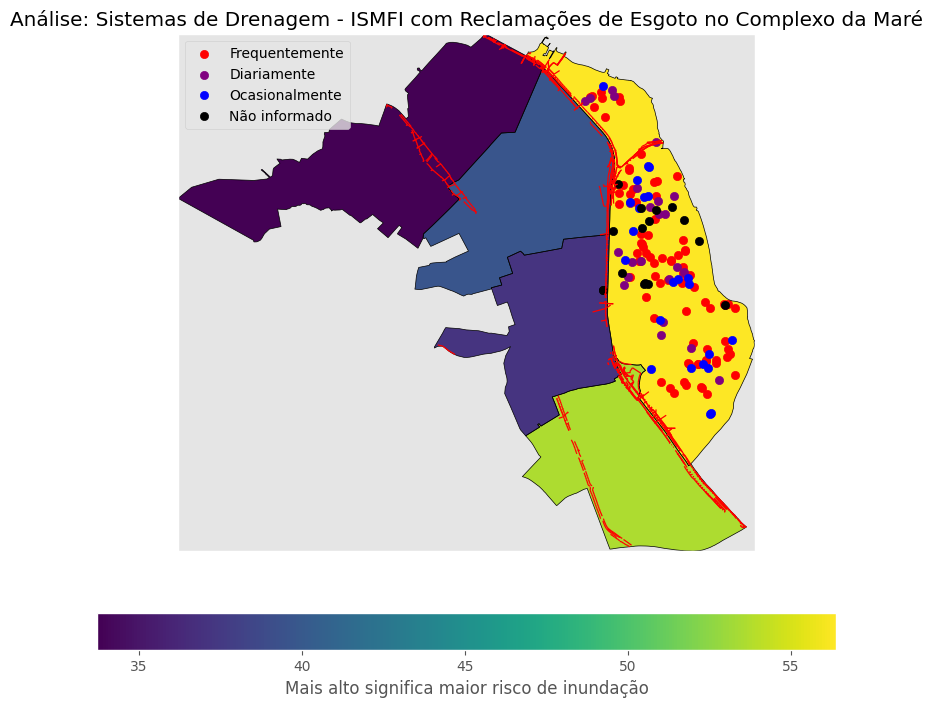

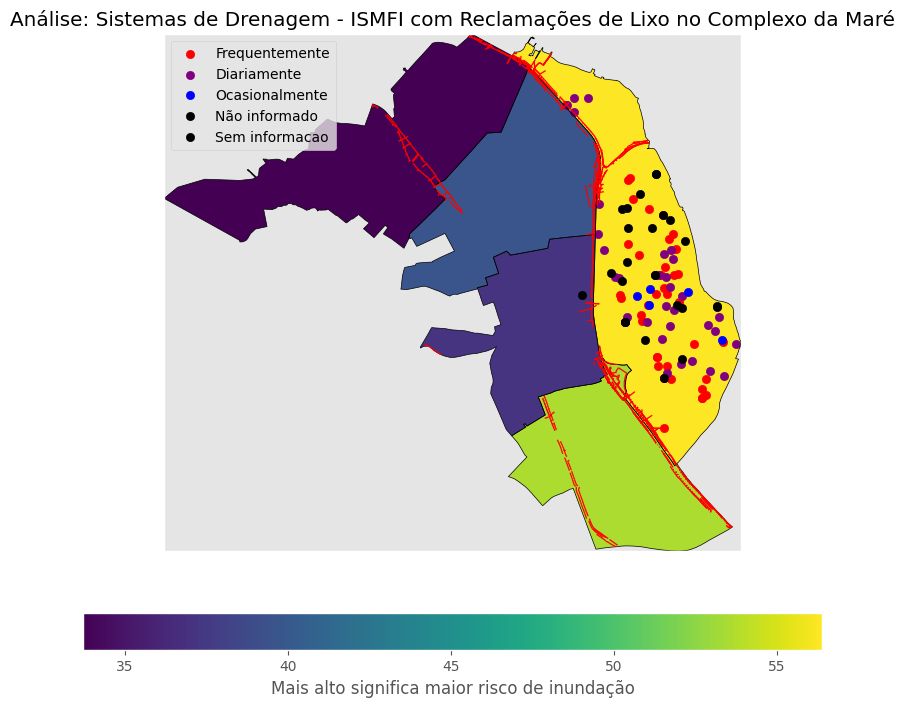

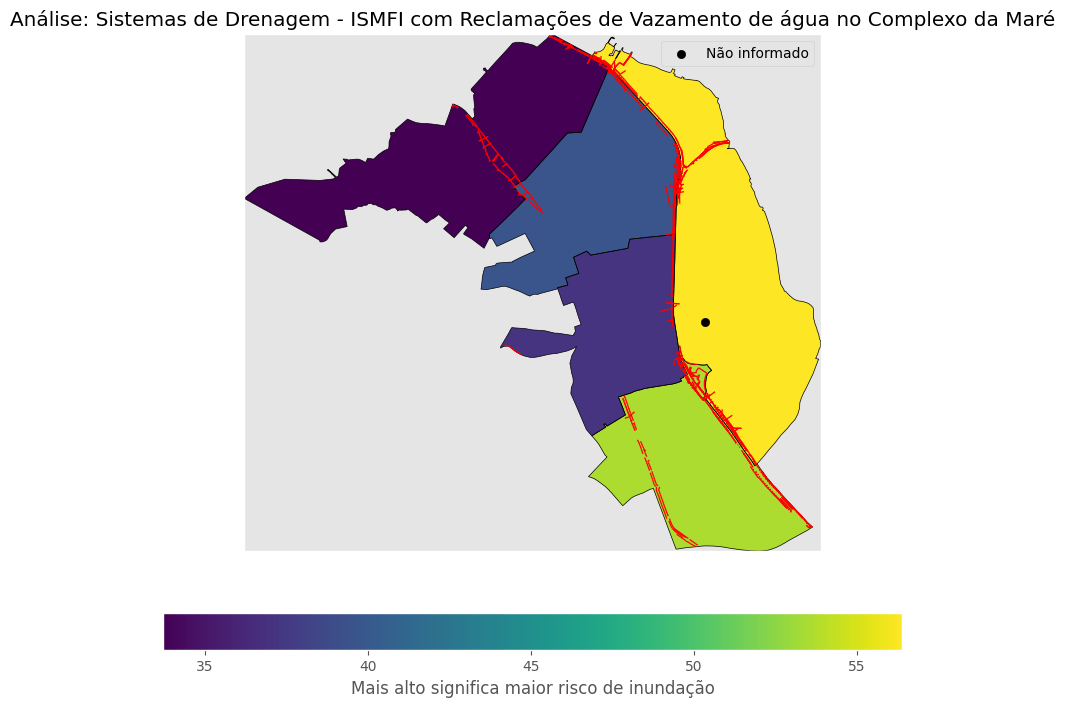

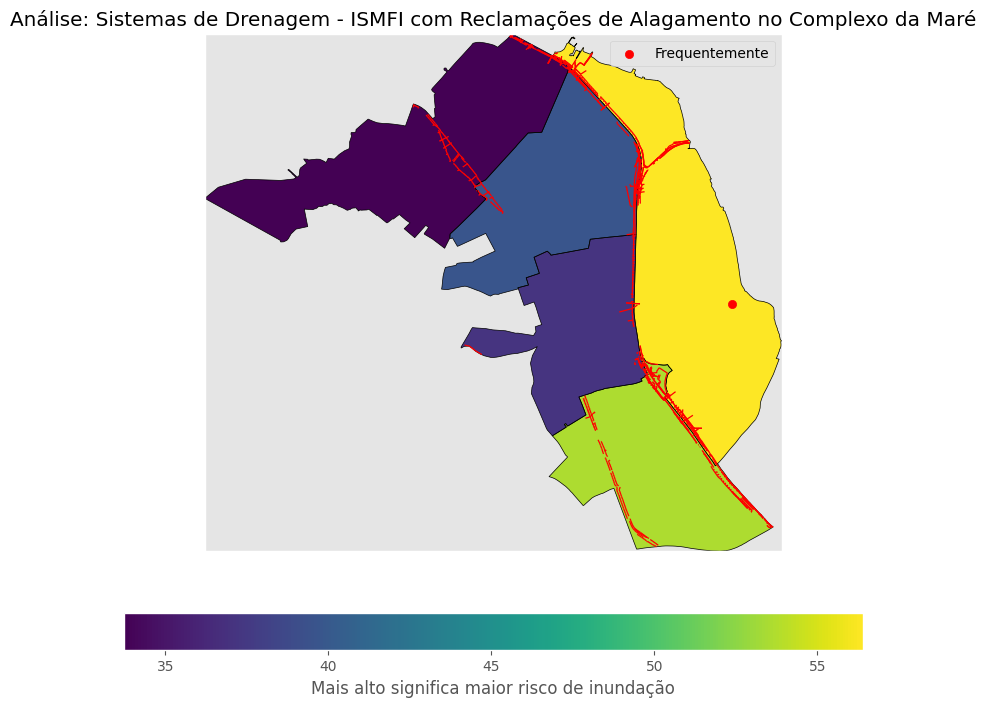

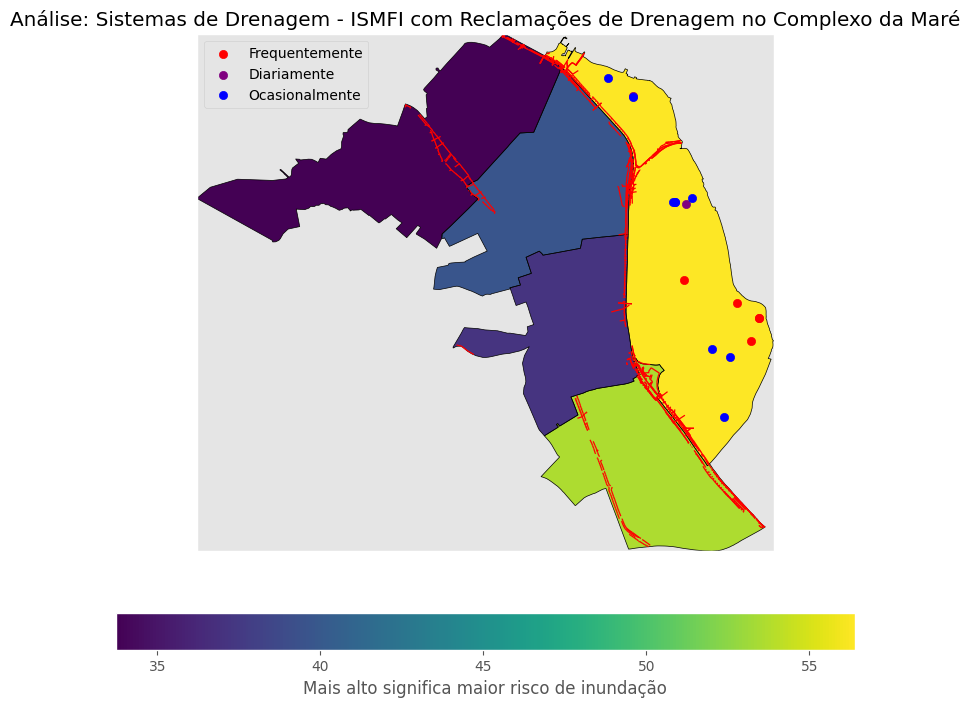

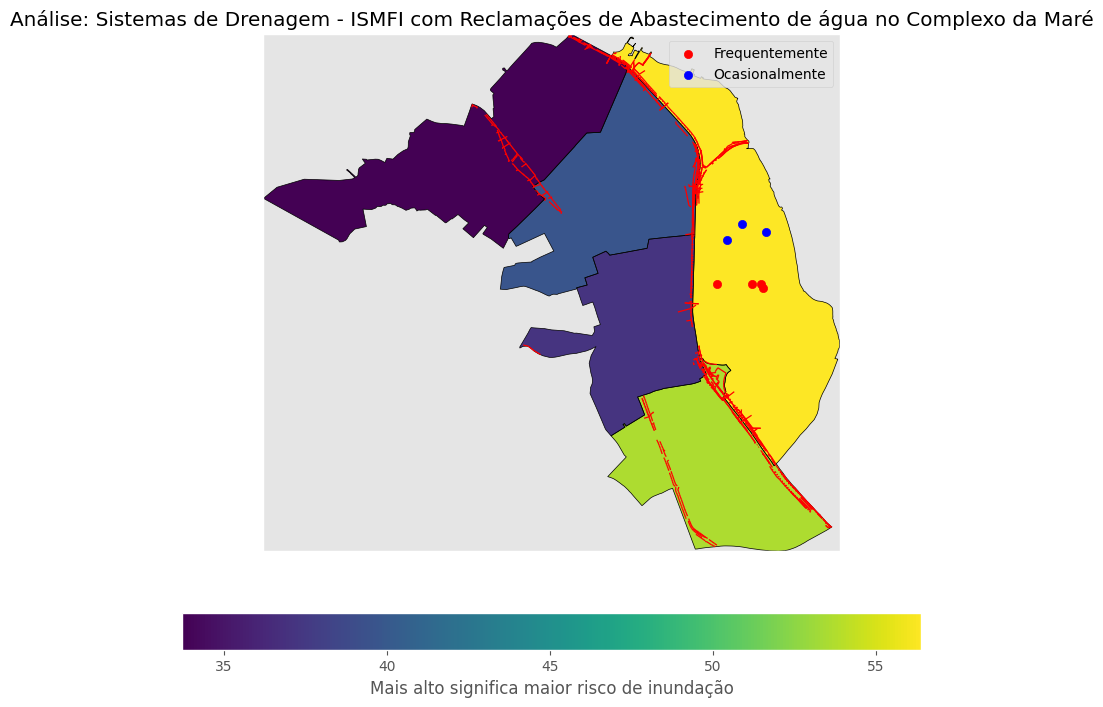

In [ ]:
for categoria in unique_categoria2:
    plot_map(geo_data, limites_rj, drenagem_rj, merged, 'Categoria 2', categoria)


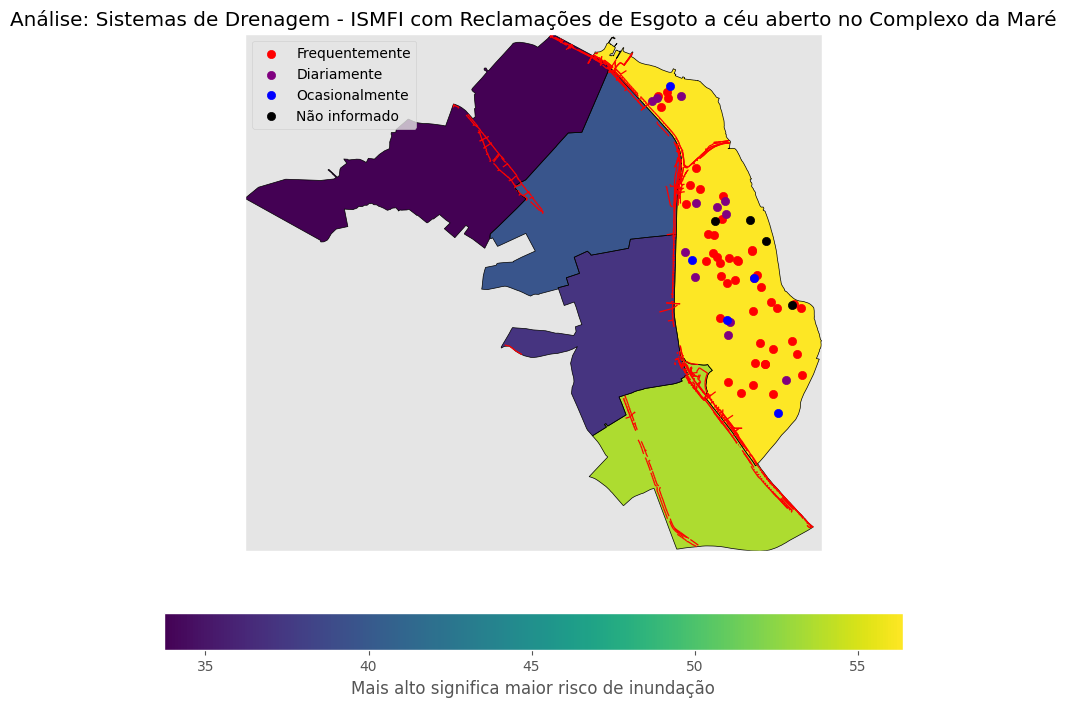

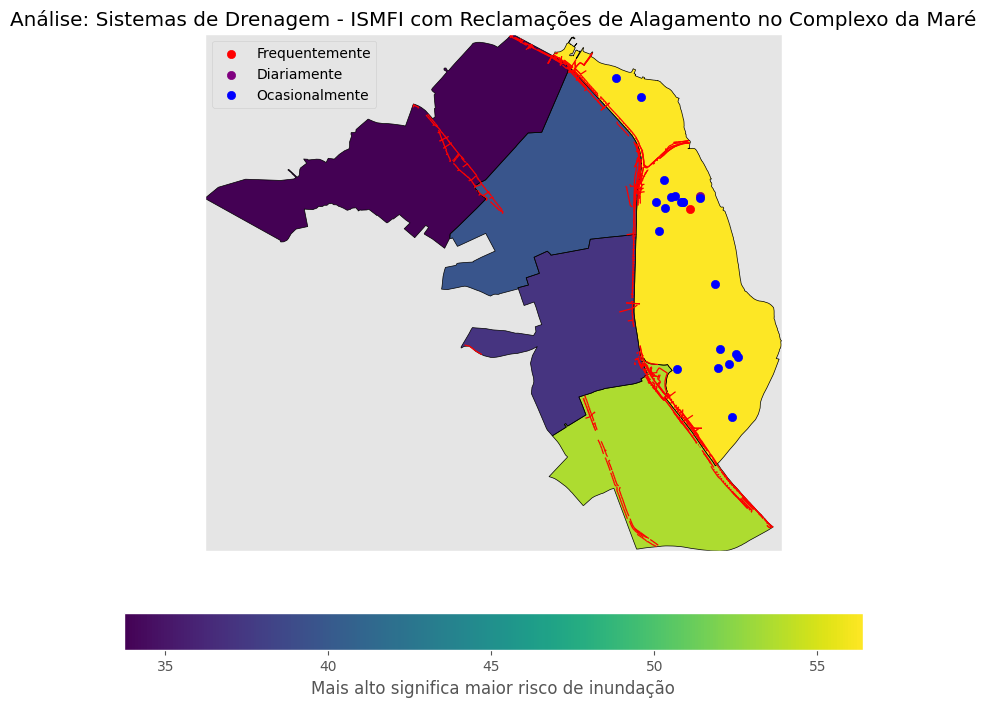

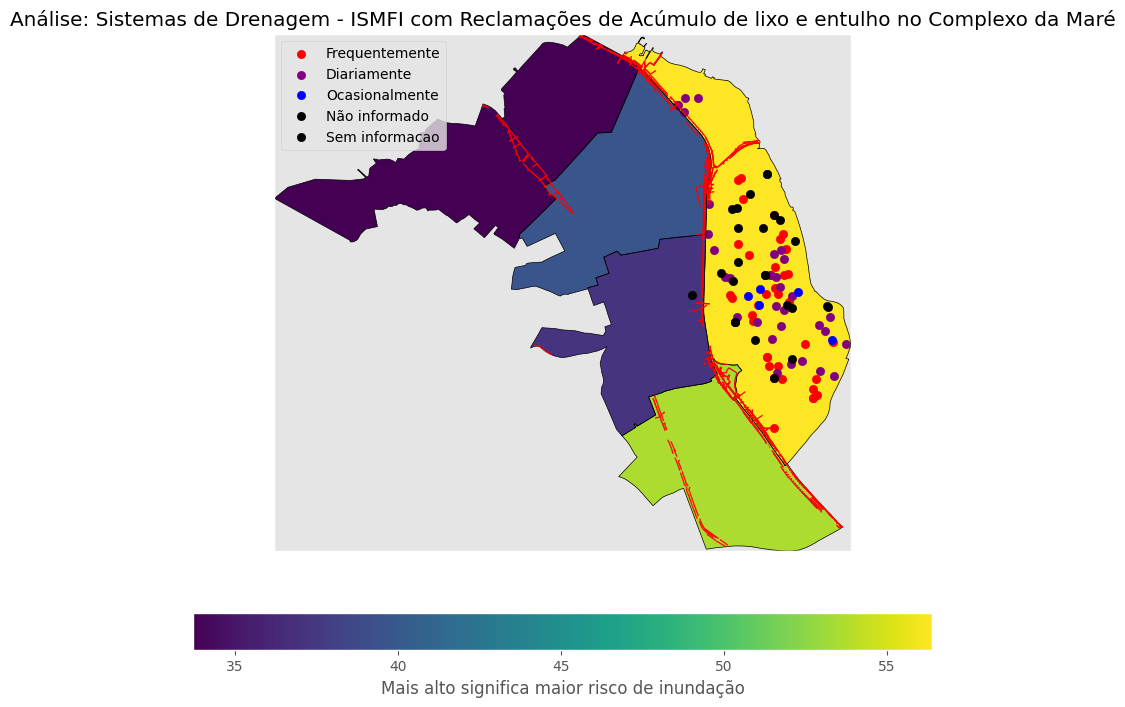

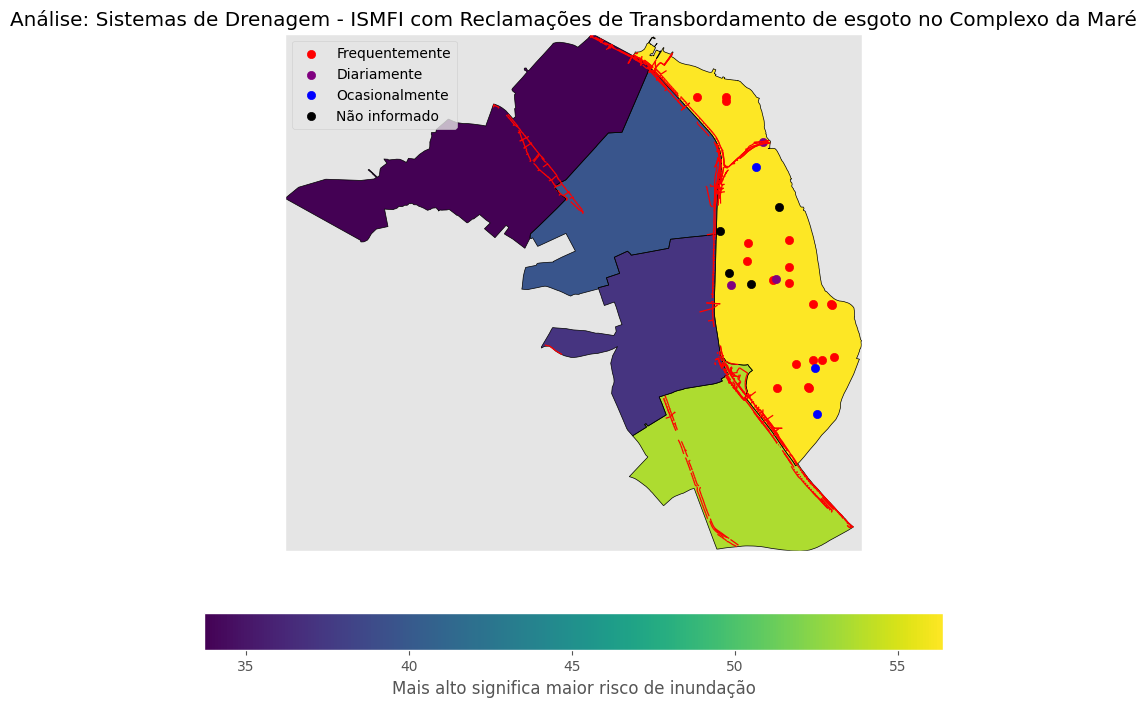

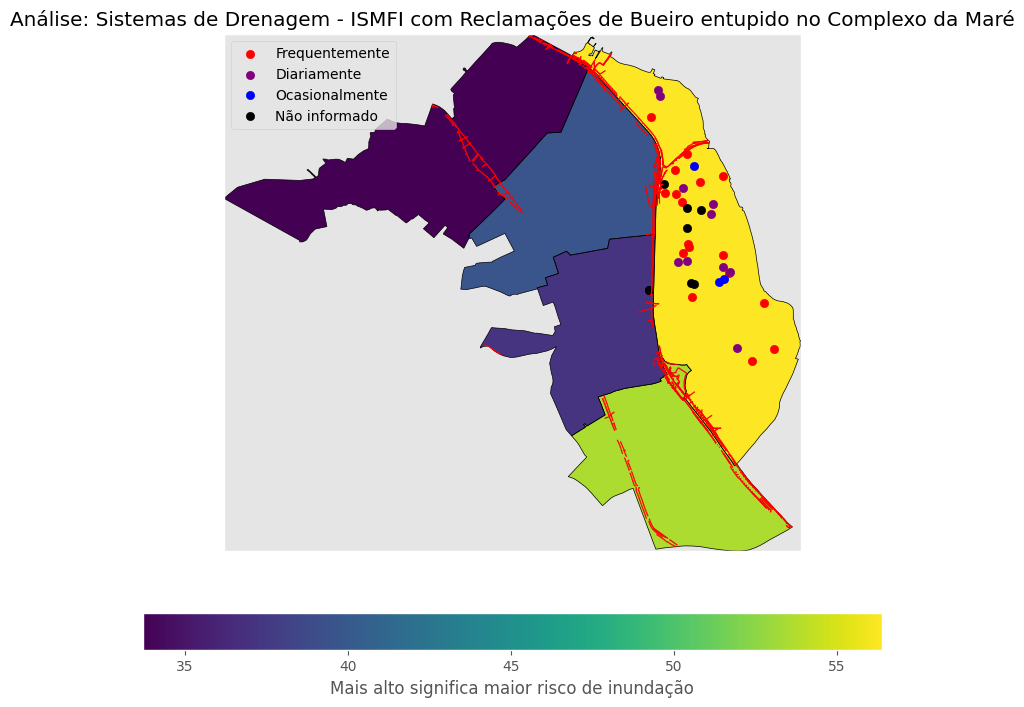

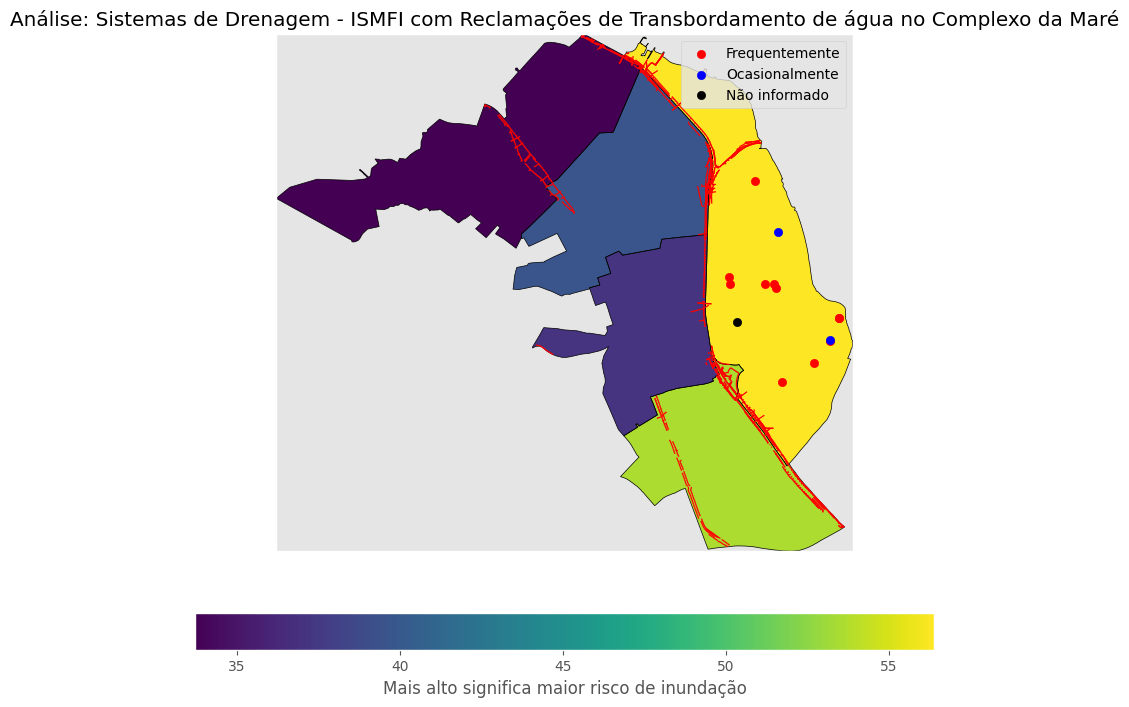

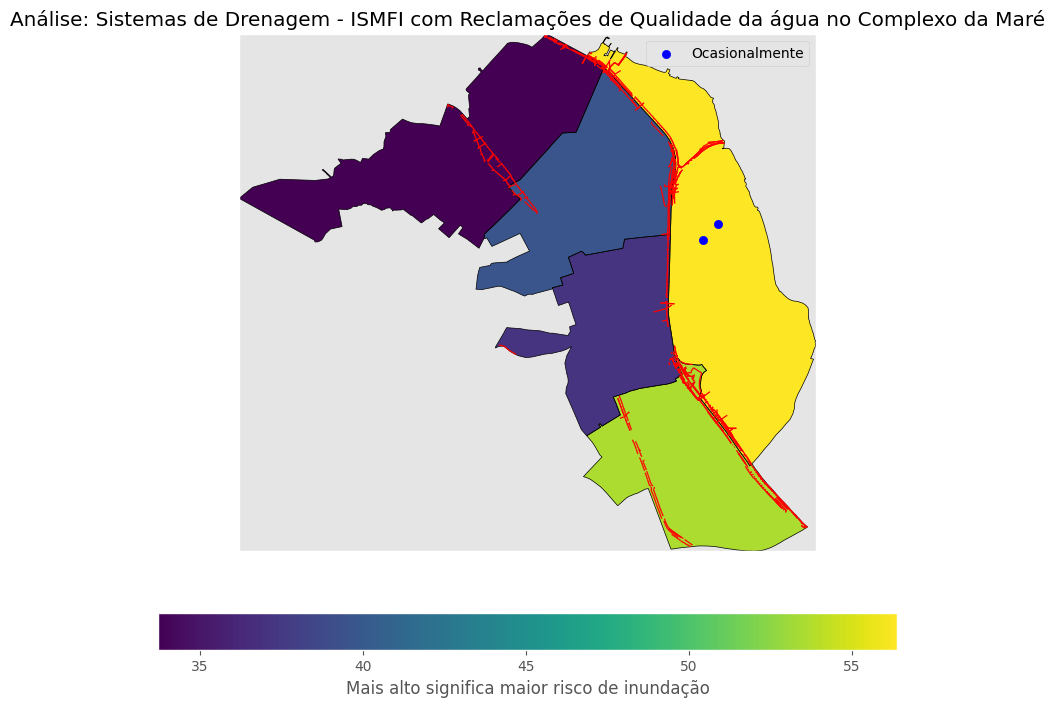

In [ ]:

for problema in unique_problemas:
    plot_map(geo_data, limites_rj, drenagem_rj, merged, 'Em que categoria se encaixaria o problema', problema)

In [ ]:
data_esgoto

Unnamed: 0 codificacao_foto   ano mes dia        data  \
0            0    20181019_0033  2018  10  19  20181019.0   
1            1    20181019_1115  2018  10  19  20181019.0   
2            2    20181105_1650  2018  11  05  20181105.0   
3            3    20181105_1651  2018  11  05  20181105.0   
10          10    20181119_2023  2018  11  19  20181119.0   
..         ...              ...   ...  ..  ..         ...   
292        293    20220621_1914  2022  06  21  20220621.0   
298        299    20220912_1705  2022  09  12  20220922.0   
307        308    20221024_1936  2022  10  24  20221024.0   
309        310    20221024_1950  2022  10  24  20201024.0   
310        311    20221024_1951  2022  10  24  20221024.0   

               Conta para gente o que está acontecendo  \
0    Oi olha só aqui no esgoto da casa 206! Tá um f...   
1            Problemas de alagamentos sempre que chove   
2                                       Sem informacao   
3             Sempre passo por lá e vejo esgoto caindo   
10                                      Sem informacao   
..                                                 ...   
292      Boa noite. Esgoto entupido a mais de 1 semana   
298                                   Esgoto entupido    
307  Vazamento de esgoto, rua Flávia Farnese 480, b...   
309  Vazamento de esgoto, rua Nova Jerusalém 482, b...   
310  Buraco na rua, em frente ao número 520, rua no...   

    Em que categoria se encaixaria o problema Categoria 2  \
0                         esgoto a céu aberto      Esgoto   
1                                  alagamento      Esgoto   
2                         esgoto a céu aberto      Esgoto   
3                         esgoto a céu aberto      Esgoto   
10                  transbordamento de esgoto      Esgoto   
..                                        ...         ...   
292                           Bueiro entupido      Esgoto   
298                           Bueiro entupido      Esgoto   
307                 Transbordamento de esgoto      Esgoto   
309                 Transbordamento de esgoto      Esgoto   
310                      Problemas com bueiro      Esgoto   

    Com que frequência isso ocorre  \
0                   Frequentemente   
1                   Ocasionalmente   
2                    Não informado   
3                   Frequentemente   
10                   Não informado   
..                             ...   
292                 Frequentemente   
298                 Frequentemente   
307                  Não informado   
309                  Não informado   
310                  Não informado   

    Consegue nos informar o endereço de onde a foto/vídeo foi tirada  \
0                                Rua Massaranduba, 206                 
1                                     Rua Santa Rita,                  
2                     Beco das Américas (Rua Tatajuba)                 
3                     Beco São Jorge (perto da praça)                  
10                           Miolo entre rua n e rua m                 
..                                                 ...                 
292                         Rua b, bloco 355, casinhas                 
298                                  Rua Guanabara, 12                 
307         rua Flávia Farnese 480, baixa do sapateiro                 
309         rua Nova Jerusalém 482, baixa do sapateiro                 
310         rua nova Jerusalém 520, baixa do sapateiro                 

    Em que localidade fica  Insira a latitude do seu endereço (opcional)  \
0        Parque Rubens Vaz                                    -22.852344   
1             Nova Holanda                                    -22.853554   
2              Parque Maré                                    -22.854895   
3             Nova Holanda                                    -22.854706   
10            Nova Holanda                                    -22.855962   
..                     ...                                     

## Densidade Demográfica

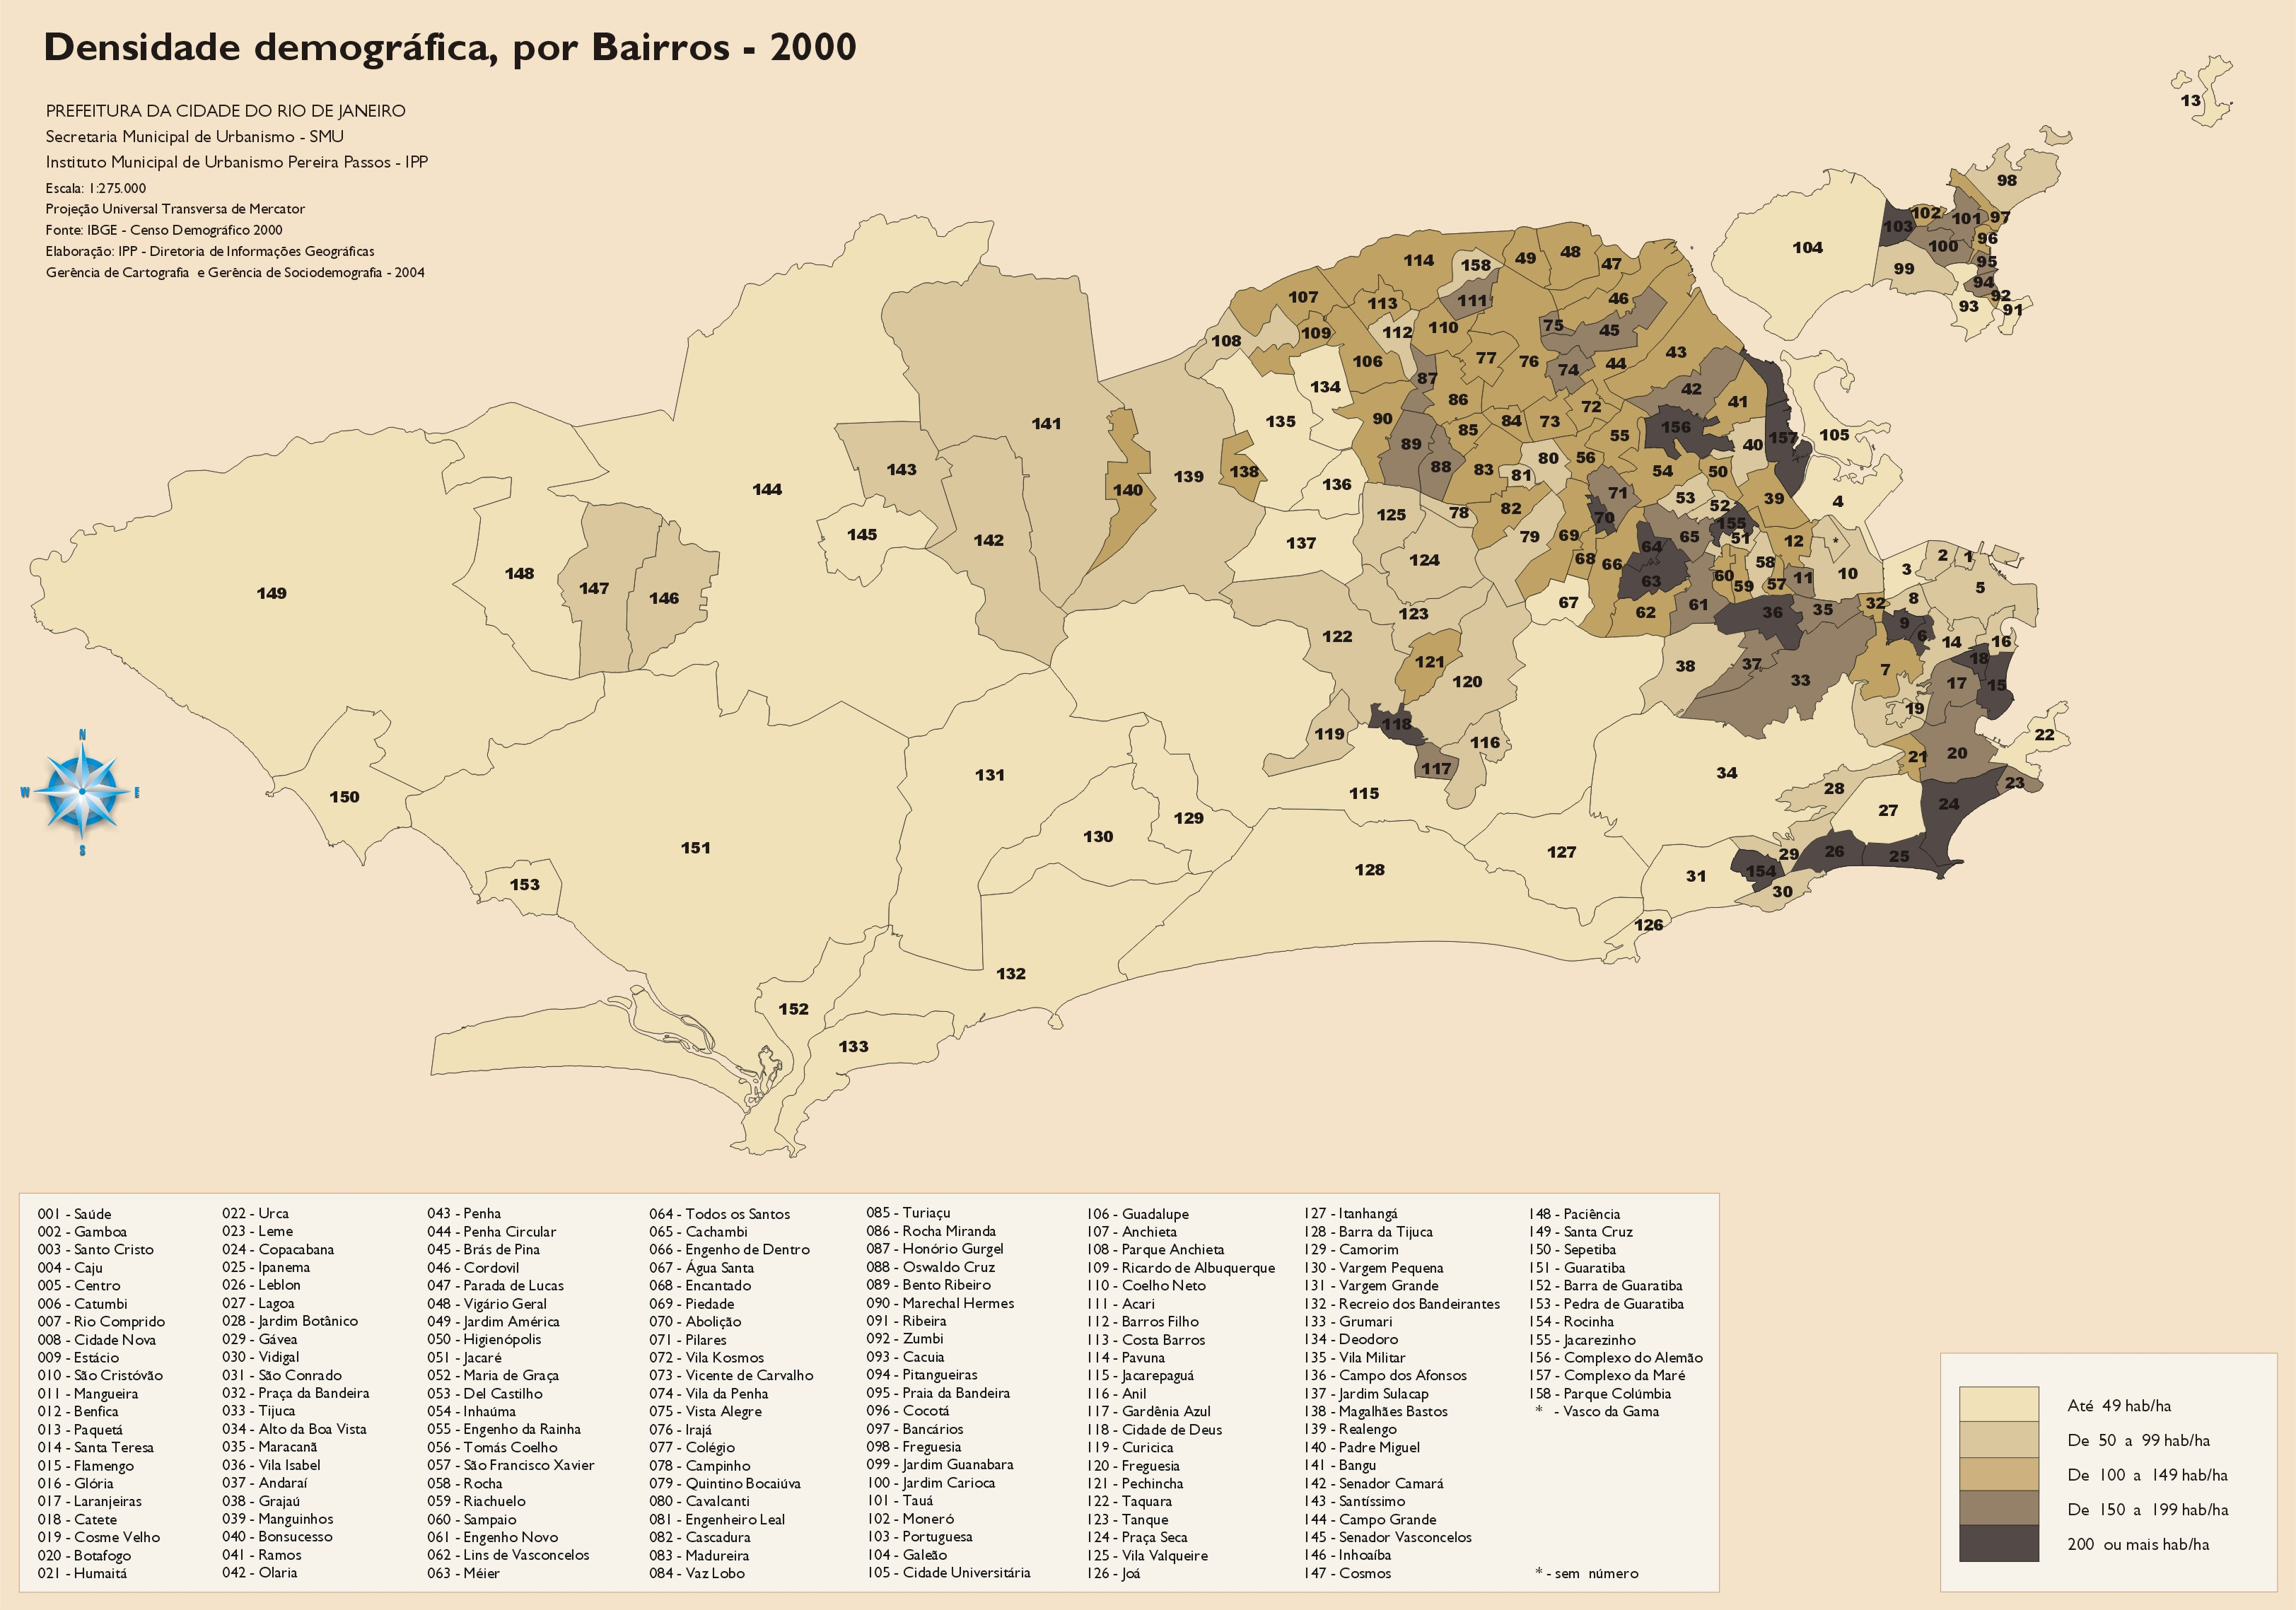

In [ ]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/Economã/1327.jpg', height=800)